# Análisis y visualización de datos

Con el objetivo de ir entendiendo la naturaleza de los datos y su modo de presentación de grafos, vamos a ir analizando los distintos tipos de nodos con sus características.

Se puede comenzar por los siguientes puntos y luego agregar otros de interés:

1- Cantidad de Personas por Edades, aqui podemos analizar la distribución de las personas de todos los equipos de trabajo, otro análisis que se puede realizar es determinar el mismo análisis pero separado por sexo.

2- Existe otro factor importante para determinar el grado de conocimiento determinado por su Seniority (organizados como Senior, Semi-senior y Junior, siendo este último el de menos experiencia), aqui podemos determinar el nivel de expertís sobre las tecnologías a analizar y con ello determinar si los equipos están altamente especializados con perfiles senior o balancean su capacidad de trabajo con perfiles de menos experiencia.
Otro factor importante a analizar es el grado de participación de las mujeres ya que de esta manera se pueden aumentar la participación de mujeres en caso de que sea muy escasa.

3- Se correlacionan las edades de las personas con los años de experiencia, que nivel de participación se observa por sexo?

4- Cuales con los conocimientos que más poseen las personas?
Teniendo en cuenta que más adelante queremos equilibrar los conocimientos que tecnologias son las dominantes? , que nivel de participación se observa por sexo?

No olvidar responder a los puntos anteriores también con las visualizaciones apropiadas.

Tip: una visualización interesante para la frecuencia de palabras es la WordCloud.

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import GridSearchCV
from IPython.display import display, HTML
import matplotlib.style as style 
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from sklearn import metrics
#import utils 

In [188]:
#Lectura
# Vamos a abrir los archivos que poseen la información
# El primer archivo posee los nodos que contienen a las personas, skills, conocimientos, team  (como se explicó en el dataset)
# Aqui se encuentran todos los features de acuerdo al tipo de nodo
nodos = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/nodes3.csv')

# El segundo archivo posee la relación que existen entre los nodos es decir un nodo persona tiene conocimientos vinculados que es lo que sabe
relaciones = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/relationships3.csv')

#Display HTML
display(nodos.head())
display(relaciones.head())

n.id name_node_a  n.type  \
0  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
1  f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L  person   
2  55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...     Dario O  person   
3  eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...      Luis D  person   
4  40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...   Edgardo O  person   

    n.category n.gender  n.age  n.experience  
0       junior     male   29.0           3.0  
1       senior     male   52.0          27.0  
2  semi-senior     male   34.0           3.0  
3       senior     male   33.0           8.0  
4       senior     male   42.0           9.0

id_node_a name_node_a  \
0  e1e8ce3faf08dd3c935ef958ab7214bb-a87ff679a2f3e...     Airflow   
1  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea   
2  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea   
3  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea   
4  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea   

                                           id_node_b  name_node_b  \
0  263db3933c2cb8e9b139373fdd57defb-a87ff679a2f3e...  Integracion   
1  7e978e6cfaa3e6de95722312e007357f-a87ff679a2f3e...       Hadoop   
2  fdbea0fad95c6f981f32120701d8f1d3-a87ff679a2f3e...      MariaDB   
3  2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...   SQL Server   
4  e9305b36f4ce5b64e3ffdde4cb4414df-a87ff679a2f3e...        MySQL   

                                     id_relationship  
0  099fa6035a5eab7a8dcb3f7c29b9cb78-a87ff679a2f3e...  
1  37a61163e6daf34ffc4cfdd85983981b-c81e728d9d4c2...  
2  d7a45d0731835e6d51b701cce147e296-c81e728d9d4c2...  
3  71bef141a7e6d0aafec0c65f0b4a28d7-c81e728d9d4c2...  
4  44e93078bffadc6bf8d4f6b69285c6f3-c81e728d9d4c2...

In [189]:
#Drop Nodos que no sean personas
nodos = nodos[nodos["n.type"] == "person"]

#Display HTMl
display(nodos.head())

n.id name_node_a  n.type  \
0  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
1  f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L  person   
2  55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...     Dario O  person   
3  eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...      Luis D  person   
4  40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...   Edgardo O  person   

    n.category n.gender  n.age  n.experience  
0       junior     male   29.0           3.0  
1       senior     male   52.0          27.0  
2  semi-senior     male   34.0           3.0  
3       senior     male   33.0           8.0  
4       senior     male   42.0           9.0

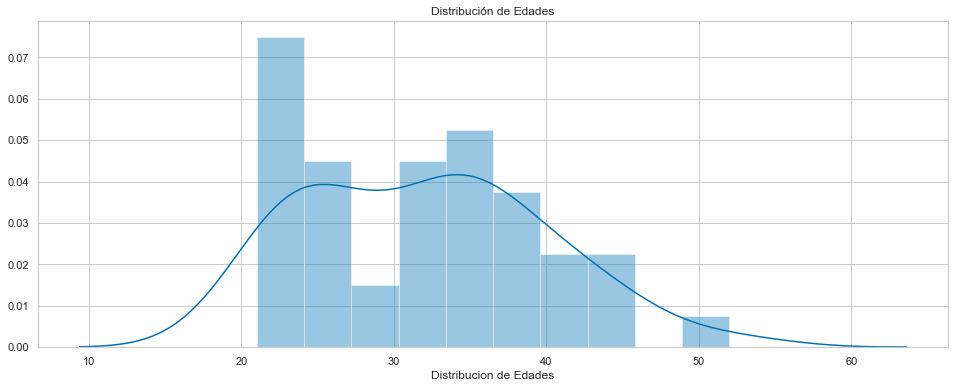

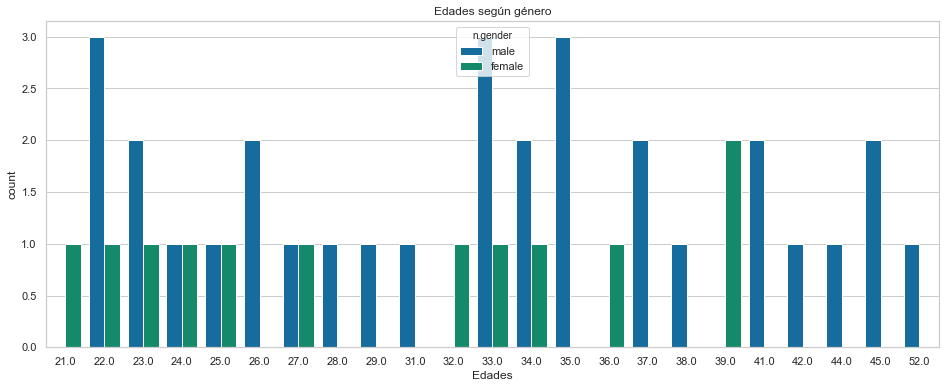

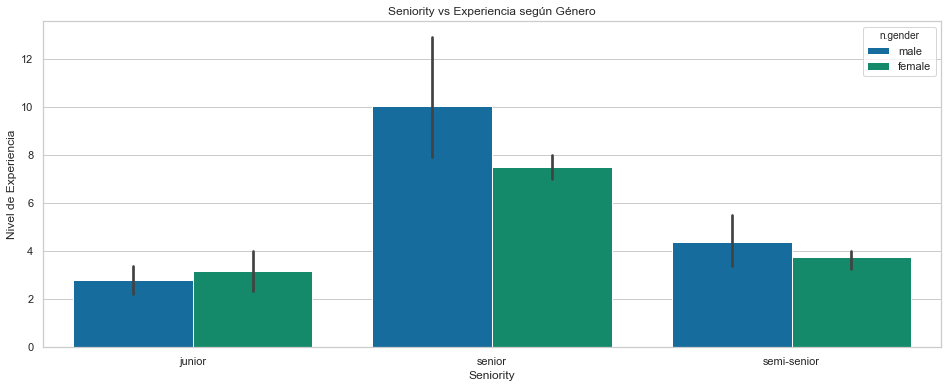

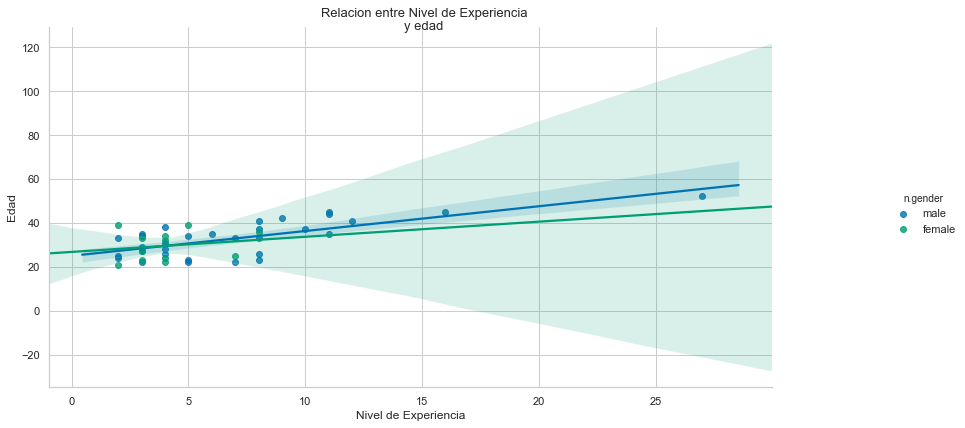

In [190]:
#Contexto
sns.set_style("whitegrid")
sns.set_context("notebook")
style.use("seaborn-colorblind")

#Primeras Visualizaciones
#Distribucion de edades
plt.figure(figsize=(16.3, 6))
g = sns.distplot(nodos["n.age"], bins = 10, 
                 axlabel="Distribucion de Edades")
g.set_title("Distribución de Edades")
plt.show()

#Edades
plt.figure(figsize=(16, 6))
g = sns.countplot(data=nodos, x="n.age", hue="n.gender")
g.set(xlabel="Edades")
g.set_title("Edades según género")
plt.show()

#Experiencia vs Seniority
plt.figure(figsize=(16.1, 6))
g = sns.barplot(x="n.category", y="n.experience", 
                data=nodos, hue="n.gender")
g.set(xlabel='Seniority', ylabel='Nivel de Experiencia')
g.set_title("Seniority vs Experiencia según Género")
plt.show()

#Experiencia vs edad
g = sns.lmplot(x="n.experience", y="n.age",
              data=nodos, hue="n.gender")
g.fig.set_size_inches(15,6)
g.set(xlabel='Nivel de Experiencia', ylabel='Edad')
g.fig.suptitle("Relacion entre Nivel de Experiencia"  +"\n" + "y edad", fontsize=13, va="center")
plt.show()

In [191]:
#Seleccion de personas
personas = nodos[nodos["n.type"] == "person"]

#Merge en un solo df
df = personas.merge(relaciones)
display(df.head())
#display(personas)

#Genero una lista de trabajadores
print("Lista de trabajadores")
trabajadores = personas["name_node_a"].unique()
print(trabajadores)
print("\n")

#Skills
print("Skills")
tech = df["name_node_b"].unique()
print(tech)

n.id name_node_a  n.type  \
0  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
1  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
2  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
3  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
4  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   

  n.category n.gender  n.age  n.experience  \
0     junior     male   29.0           3.0   
1     junior     male   29.0           3.0   
2     junior     male   29.0           3.0   
3     junior     male   29.0           3.0   
4     junior     male   29.0           3.0   

                                           id_node_a  \
0  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   
1  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   
2  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   
3  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   
4  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   

                                           id_node_b  name_node_b  \
0  e8173ce541b175489ea47a083af3b629-a87ff679a2f3e...          AWS   
1  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...          DBA   
2  43b6f263edd9539008d17939797e828c-a87ff679a2f3e...  Golden Gate   
3  202a4729f08cfad5658fb7a6fb4ab47a-a87ff679a2f3e...         java   
4  7658e020131c329d176f7ad2d46b0c42-a87ff679a2f3e...       Oracle   

                                     id_relationship  
0  799db43b85fc5aea452158adecba29d1-c81e728d9d4c2...  
1  cf4ec00e901dcb90f14e990f0b920412-c81e728d9d4c2...  
2  d6f14eb3b7830926d80bced8ac29a918-c81e728d9d4c2...  
3  76ea087724a22e038dd22219eb4b6823-c81e728d9d4c2...  
4  fc1090bc305bfd4455357aa542e00eef-c81e728d9d4c2...

Lista de trabajadores
['David H' 'Walter L' 'Dario O' 'Luis D' 'Edgardo O' 'Hernan U'
 'Cristian G' 'Diego M' 'Armando I' 'Ursula P' 'Esteban Q' 'Susana S'
 'Rircardo I' 'Luis U' 'Gabriela B' 'Hugo S' 'Martina S' 'Patricia L'
 'Mauricio H' 'Gustavo M' 'Oscar H' 'Miguel B' 'Karen H' 'Natali L'
 'Victoria B' 'Pablo A' 'Juan P' 'Mariana T' 'Luciano M' 'Marcela'
 'Daniel' 'Leonardo' 'Matias' 'Lionel' 'Miguel' 'Luciana' 'Marcelo'
 'Jonatan' 'Lucas' 'Fernando' 'Gastón' 'Andrea' 'Martin']


Skills
['AWS' 'DBA' 'Golden Gate' 'java' 'Oracle' 'SQL Server' 'Developer'
 'Linux' 'Docker' 'Vertica' 'Technical Leader' 'MariaDB' 'Data Scientist'
 'Hadoop' 'Spark' 'scala' 'PostgreSQL' 'Google cloud' 'R' 'MySQL' 'phyton'
 'windows' 'MongoDB' 'Oracle Cloud' 'unix' 'ODI' 'S3' 'EC2' 'Kubernetes'
 'talend' 'pentaho' 'neo4j' 'SQL' 'AWS Lambda' 'Redis' 'Azure']


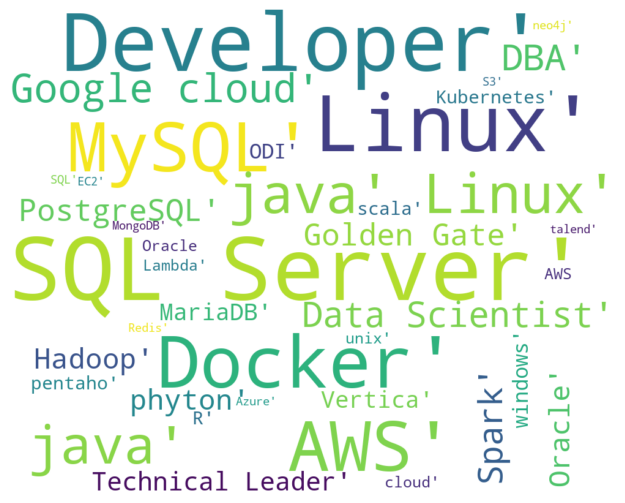

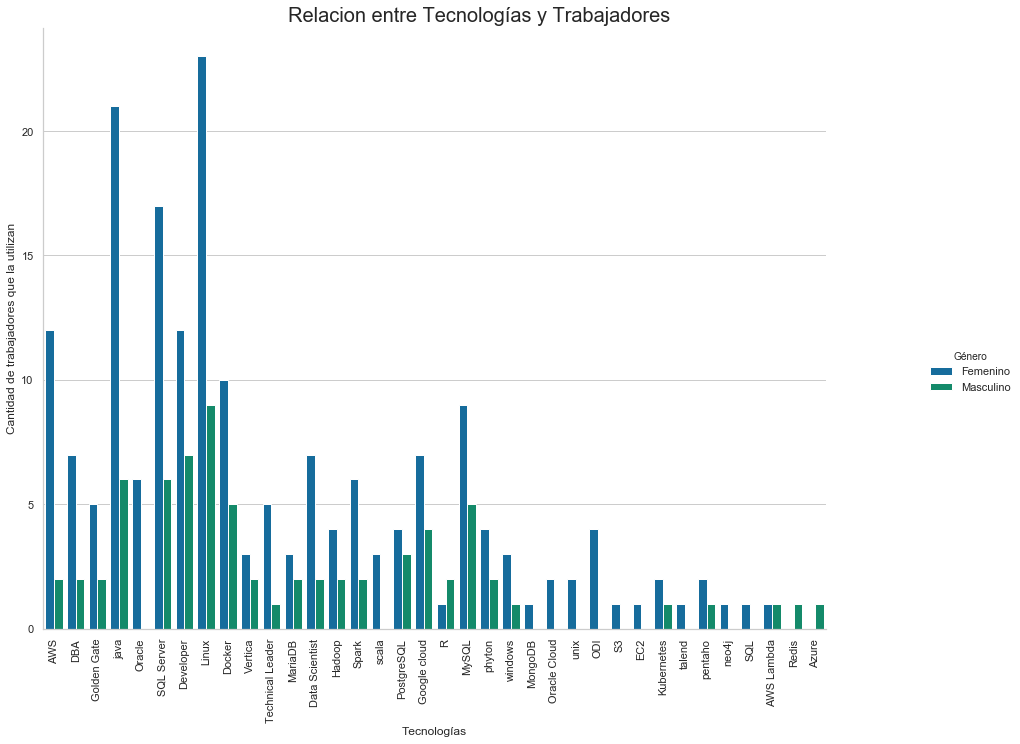

In [192]:
#Librerias
!pip install wordcloud
from wordcloud import WordCloud
import numpy as np
from PIL import Image

#Estilo del gráfico
sns.set_context("notebook")
style.use("seaborn-colorblind")

#Visualizaciones
#Skills
Skills = df['name_node_b'].values
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
wc = wordcloud = WordCloud(width=1000, height=800, background_color="white")
wc.generate(str(Skills))
plt.figure(figsize = (16,9) )
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Gráfico y customización
g = sns.catplot(x="name_node_b", data=df, hue="n.gender", kind="count", legend_out=True)
plt.xticks(rotation=90)
g.fig.set_size_inches(15,10)
g.set(xlabel='Tecnologías', ylabel='Cantidad de trabajadores que la utilizan')
g.fig.suptitle("Relacion entre Tecnologías y Trabajadores", fontsize=20, va="center")
g._legend.set_title("Género")
new_labels = ['Femenino', 'Masculino']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

#Visualización
plt.show()

<class 'networkx.classes.graph.Graph'>


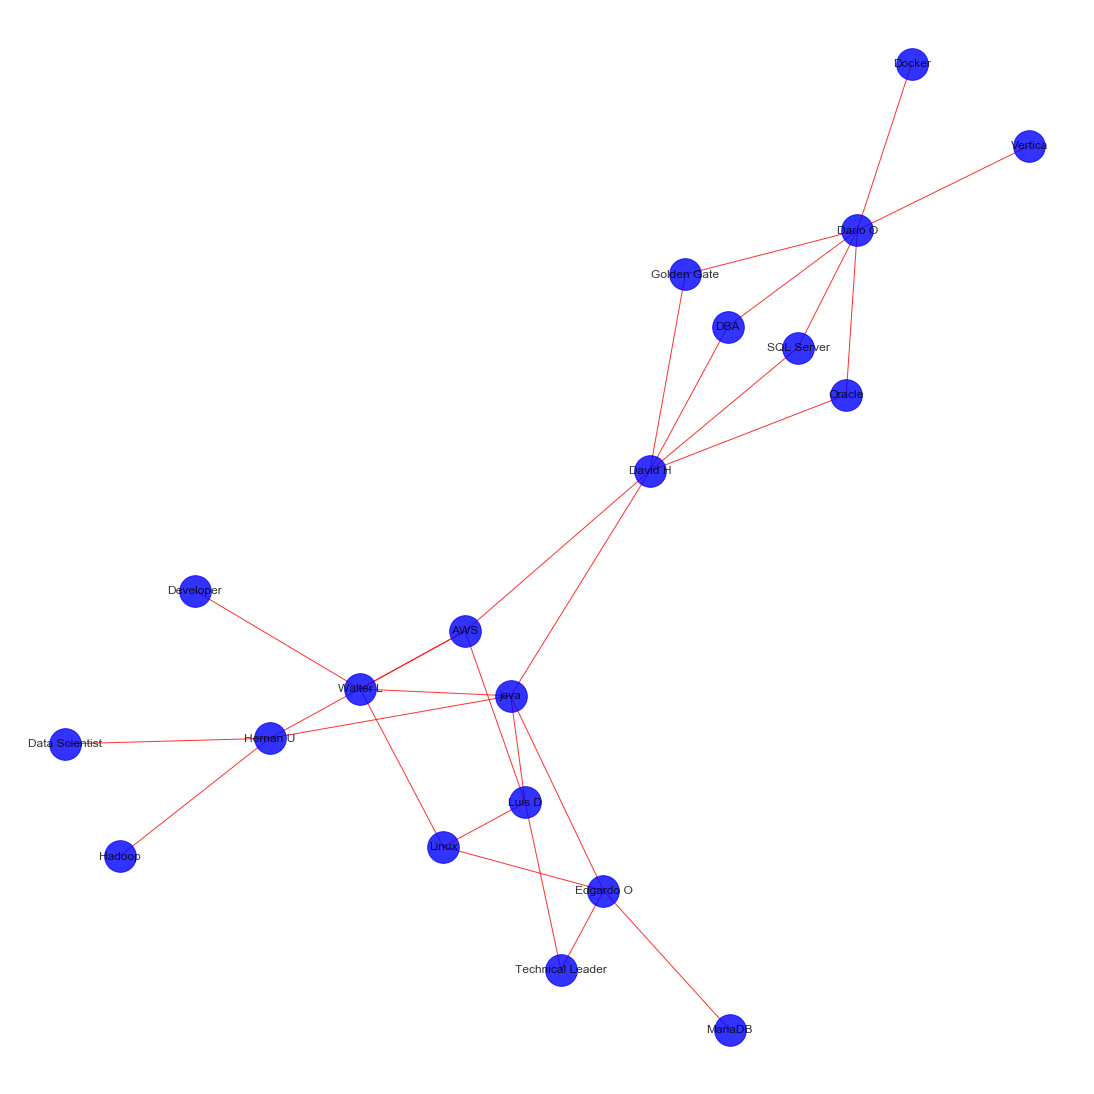

In [193]:
#Librerias 
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#Estilo del gráfico
sns.set_context("notebook")
style.use("seaborn-colorblind")

#Df
df1 = df.iloc[0:30, :]
#display(df1)

#Gráfico
G = nx.from_pandas_edgelist(df1, 'name_node_a', 'name_node_b')

print(type(G))
# larger figure size
plt.figure(3,figsize=(15,15)) 
#nx.draw(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)
#nx.draw_random(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)
#nx.draw_circular(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8) 
#nx.draw_spectral(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)
nx.draw_spring(G, with_labels=True, node_color='b', node_size=1000, alpha=0.8, edge_color="r")
plt.show()


### Estadísticas descriptivas


In [194]:
nodos.describe()

n.age  n.experience
count  43.000000     43.000000
mean   32.023256      6.232558
std     7.753612      4.602469
min    21.000000      2.000000
25%    25.000000      3.000000
50%    33.000000      5.000000
75%    37.000000      8.000000
max    52.000000     27.000000

In [195]:
relaciones.describe()

id_node_a name_node_a  \
count                                                 383         383   
unique                                                 93          93   
top     eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...       Team3   
freq                                                   16          16   

                                                id_node_b name_node_b  \
count                                                 383         383   
unique                                                100          99   
top     35c4798d0240368c638e55bae0d57ffa-a87ff679a2f3e...       Linux   
freq                                                   32          32   

                                          id_relationship  
count                                                 383  
unique                                                383  
top     91d903730b5d13ecc851ae70d63d9587-c81e728d9d4c2...  
freq                                                    1

In [196]:
dtypes = pd.DataFrame(relaciones.dtypes)
dtypes.index.name = 'Campo'
dtypes.rename(columns={0: 'Tipo'})

Tipo
Campo                  
id_node_a        object
name_node_a      object
id_node_b        object
name_node_b      object
id_relationship  object

In [197]:
# En el caso de querer trabajar solo con las personas se puede aplicar lo siguiente:
#Drop Nodos que no sean personas
personas = nodos[nodos["n.type"] == "person"]

#Display html
display(personas.head(5))

n.id name_node_a  n.type  \
0  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
1  f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L  person   
2  55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...     Dario O  person   
3  eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...      Luis D  person   
4  40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...   Edgardo O  person   

    n.category n.gender  n.age  n.experience  
0       junior     male   29.0           3.0  
1       senior     male   52.0          27.0  
2  semi-senior     male   34.0           3.0  
3       senior     male   33.0           8.0  
4       senior     male   42.0           9.0

In [198]:
dtypes = pd.DataFrame(personas.dtypes)
dtypes.index.name = 'Campo'
dtypes.rename(columns={0: 'Tipo'})

Tipo
Campo                
n.id           object
name_node_a    object
n.type         object
n.category     object
n.gender       object
n.age         float64
n.experience  float64

Vamos a necesitar conocer los tipos de datos en caso de querer trabajar con el dataset de personas

In [199]:
personas.describe()

Campo      n.age  n.experience
count  43.000000     43.000000
mean   32.023256      6.232558
std     7.753612      4.602469
min    21.000000      2.000000
25%    25.000000      3.000000
50%    33.000000      5.000000
75%    37.000000      8.000000
max    52.000000     27.000000

Para visualizar la distribución de las edades

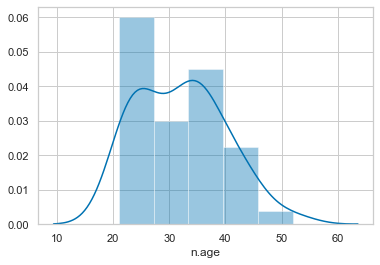

In [200]:
import seaborn as sns
sns.distplot(personas['n.age'], kde=True);


Para calcular la probabilidad de los valores posibles sexo y seniority (category), una forma más sencilla con la operación value_counts de pandas.


In [201]:
data = personas['n.gender'].value_counts(normalize=True).reset_index()
data

index  n.gender
0    male   0.72093
1  female   0.27907

In [202]:
data = personas['n.category'].value_counts(normalize=True).reset_index()
data

index  n.category
0       senior    0.418605
1  semi-senior    0.325581
2       junior    0.255814

Para poder trabajar con ambos dataset necesitamos hacer lo siguiente

In [203]:
resultante = nodos.merge(relaciones, left_on='n.id', right_on='id_node_a')

In [204]:
display(resultante.head())

Campo                                               n.id name_node_a_x  \
0      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   
1      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   
2      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   
3      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   
4      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   

Campo  n.type n.category n.gender  n.age  n.experience  \
0      person     junior     male   29.0           3.0   
1      person     junior     male   29.0           3.0   
2      person     junior     male   29.0           3.0   
3      person     junior     male   29.0           3.0   
4      person     junior     male   29.0           3.0   

Campo                                          id_node_a name_node_a_y  \
0      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   
1      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   
2      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   
3      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   
4      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   

Campo                                          id_node_b  name_node_b  \
0      e8173ce541b175489ea47a083af3b629-a87ff679a2f3e...          AWS   
1      720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...          DBA   
2      43b6f263edd9539008d17939797e828c-a87ff679a2f3e...  Golden Gate   
3      202a4729f08cfad5658fb7a6fb4ab47a-a87ff679a2f3e...         java   
4      7658e020131c329d176f7ad2d46b0c42-a87ff679a2f3e...       Oracle   

Campo                                    id_relationship  
0      799db43b85fc5aea452158adecba29d1-c81e728d9d4c2...  
1      cf4ec00e901dcb90f14e990f0b920412-c81e728d9d4c2...  
2      d6f14eb3b7830926d80bced8ac29a918-c81e728d9d4c2...  
3      76ea087724a22e038dd22219eb4b6823-c81e728d9d4c2...  
4      fc1090bc305bfd4455357aa542e00eef-c81e728d9d4c2...

Si queremos trabajar con las colunmas de padre e hijo de esta primer relación

In [205]:
resultante[resultante['n.type']=='person'][['n.category','name_node_a_y','name_node_b']]
resultante.sample(3)

Campo   n.category name_node_a_y       name_node_b
0           junior       David H               AWS
1           junior       David H               DBA
2           junior       David H       Golden Gate
3           junior       David H              java
4           junior       David H            Oracle
5           junior       David H        SQL Server
6           senior      Walter L               AWS
7           senior      Walter L         Developer
8           senior      Walter L              java
9           senior      Walter L             Linux
10     semi-senior       Dario O               DBA
11     semi-senior       Dario O            Docker
12     semi-senior       Dario O       Golden Gate
13     semi-senior       Dario O            Oracle
14     semi-senior       Dario O        SQL Server
15     semi-senior       Dario O           Vertica
16          senior        Luis D               AWS
17          senior        Luis D              java
18          senior        Luis D             Linux
19          senior        Luis D             Linux
20          senior        Luis D  Technical Leader
21          senior     Edgardo O              java
22          senior     Edgardo O             Linux
23          senior     Edgardo O             Linux
24          senior     Edgardo O           MariaDB
25          senior     Edgardo O  Technical Leader
26     semi-senior      Hernan U               AWS
27     semi-senior      Hernan U    Data Scientist
28     semi-senior      Hernan U            Hadoop
29     semi-senior      Hernan U              java
..             ...           ...               ...
233    semi-senior      Fernando        AWS Lambda
234    semi-senior      Fernando            phyton
235    semi-senior      Fernando            Docker
236    semi-senior      Fernando        Kubernetes
237    semi-senior      Fernando             Linux
238    semi-senior      Fernando             Spark
239    semi-senior      Fernando             MySQL
240    semi-senior      Fernando        SQL Server
241    semi-senior      Fernando                 R
242    semi-senior        Gastón               DBA
243    semi-senior        Gastón               ODI
244    semi-senior        Gastón           pentaho
245    semi-senior        Gastón       Golden Gate
246    semi-senior        Andrea            Hadoop
247    semi-senior        Andrea           MariaDB
248    semi-senior        Andrea        SQL Server
249    semi-senior        Andrea             MySQL
250    semi-senior        Andrea            Docker
251    semi-senior        Andrea             Linux
252    semi-senior        Andrea             Redis
253    semi-senior        Andrea        Kubernetes
254    semi-senior        Andrea        AWS Lambda
255    semi-senior        Andrea             Azure
256    semi-senior        Andrea           pentaho
257    semi-senior        Andrea         Developer
258         senior        Martin    Data Scientist
259         senior        Martin           Vertica
260         senior        Martin        SQL Server
261         senior        Martin            phyton
262         senior        Martin               ODI

[263 rows x 3 columns]

# Análisis exploratorio y curación de datos
En ésta entrega se comenzará a preparar el dataset para los prácticos siguientes. Algunos puntos de aquí ya han sido cubiertos en la entrega anterior para hacer el análisis. Otros pueden tener un tratamiento especial según nuestro enfoque de NLP.

## Listado de puntos a cubrir en análisis y curación:

a. Asegurarse de tener ids/claves únicas
b. Chequear que no haya datos duplicados
c. No usar caracteres especiales en las etiquetas de variables
d. Verificar que no haya problemas de codificación/encoding
e. Verificar la consistencia de las variables
f. Identificar y documentar valores atípicos/outliers. Qué outliers pueden haberse encontrado en el análisis del práctico previo?
g. Tratar valores faltantes: quitar o imputar. En éste caso, se correspondería tambien con buscar si hay conversaciones vacías, y quitarlas ya que no aportarían nada a los prácticos siguientes
h. Codificar variables: las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas. Aquí ya se puede empezar a pensar en vectorizar las frases para los prácticos posteriores.
Con los puntos anteriores ya se puede preparar los datasets que vamos a usar más adelante.

DATASET1- Preparar un dataset para usar modelos supervisados. Éste debe incluir las personas, los conocimientos, los perfiles (skills) opcional (los teams), que son las que se van a usar para en armar una regresión lineal sobre las personas con los años de experiencias vs el ranking que posee de sus conocimientos.

DATASET2- Preparar el dataset para el práctico de aprendizaje no supervisado. Éste está orientado a descubrir dentificar los perfiles que puede poseer cada persona, en base a ciertas personas ya clasificadas, por lo que en éste caso debe filtrar éste subconjunto de perfiles (Skills).

Por último, guarde los datasets en un formato conveniente para usar después. Importante: guardarlos en nuevos archivos para no sobreescribir los datos crudos u originales


a.

In [206]:
pd.Series(nodos.index, dtype=str).describe()

count     43
unique    43
top       28
freq       1
dtype: object

In [207]:
nodos[nodos.index.duplicated()]

Empty DataFrame
Columns: [n.id, name_node_a, n.type, n.category, n.gender, n.age, n.experience]
Index: []

In [208]:
pd.Series(relaciones.index, dtype=str).describe()

count     383
unique    383
top       255
freq        1
dtype: object

In [209]:
relaciones[relaciones.index.duplicated()]

Empty DataFrame
Columns: [id_node_a, name_node_a, id_node_b, name_node_b, id_relationship]
Index: []

Conclusión: no hay índices/ids/claves duplicados.

b.

In [210]:
nodos[nodos.duplicated()]

Empty DataFrame
Columns: [n.id, name_node_a, n.type, n.category, n.gender, n.age, n.experience]
Index: []

In [211]:
relaciones[relaciones.duplicated()]

Empty DataFrame
Columns: [id_node_a, name_node_a, id_node_b, name_node_b, id_relationship]
Index: []

c.

In [212]:
display(nodos.columns[~nodos.columns.str.match(r'^(\w+)$')])

Index(['n.id', 'n.type', 'n.category', 'n.gender', 'n.age', 'n.experience'], dtype='object', name='Campo')

In [213]:
nodos.columns = nodos.columns.str.replace('.', '_')
nodos.head()

Campo                                               n_id name_node_a  n_type  \
0      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
1      f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L  person   
2      55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...     Dario O  person   
3      eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...      Luis D  person   
4      40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...   Edgardo O  person   

Campo   n_category n_gender  n_age  n_experience  
0           junior     male   29.0           3.0  
1           senior     male   52.0          27.0  
2      semi-senior     male   34.0           3.0  
3           senior     male   33.0           8.0  
4           senior     male   42.0           9.0

In [214]:
display(relaciones.columns[~relaciones.columns.str.match(r'^(\w+)$')])

Index([], dtype='object', name='Campo')

d.

# helpful character encoding module
import chardet
import string
# look at the first ten thousand bytes to guess the character encoding
with open("https://github.com/fgpalacios/diplodatos2020/blob/master/dataset/nodes3.csv", 'rb') as rawdata_nodos:
    result = chardet.detect(rawdata_nodos.read(1000))

# check what the character encoding might be
result

In [216]:
!pip install ftfy
import ftfy.badness as bad

In [217]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

In [218]:
for c in nodos.columns:
    name = c+'weirdness'
    nodos[name] = nodos[c].apply(weird)
    print(nodos[nodos[name] > 1].count())

Campo
n_id             0
name_node_a      0
n_type           0
n_category       0
n_gender         0
n_age            0
n_experience     0
n_idweirdness    0
dtype: int64
Campo
n_id                    0
name_node_a             0
n_type                  0
n_category              0
n_gender                0
n_age                   0
n_experience            0
n_idweirdness           0
name_node_aweirdness    0
dtype: int64
Campo
n_id                    0
name_node_a             0
n_type                  0
n_category              0
n_gender                0
n_age                   0
n_experience            0
n_idweirdness           0
name_node_aweirdness    0
n_typeweirdness         0
dtype: int64
Campo
n_id                    0
name_node_a             0
n_type                  0
n_category              0
n_gender                0
n_age                   0
n_experience            0
n_idweirdness           0
name_node_aweirdness    0
n_typeweirdness         0
n_categoryweirdness     0
dtype

In [219]:
for c in relaciones.columns:
    name = c+'weirdness'
    relaciones[name] = relaciones[c].apply(weird)
    print(relaciones[relaciones[name] > 1].count())

Campo
id_node_a             0
name_node_a           0
id_node_b             0
name_node_b           0
id_relationship       0
id_node_aweirdness    0
dtype: int64
Campo
id_node_a               0
name_node_a             0
id_node_b               0
name_node_b             0
id_relationship         0
id_node_aweirdness      0
name_node_aweirdness    0
dtype: int64
Campo
id_node_a               0
name_node_a             0
id_node_b               0
name_node_b             0
id_relationship         0
id_node_aweirdness      0
name_node_aweirdness    0
id_node_bweirdness      0
dtype: int64
Campo
id_node_a               0
name_node_a             0
id_node_b               0
name_node_b             0
id_relationship         0
id_node_aweirdness      0
name_node_aweirdness    0
id_node_bweirdness      0
name_node_bweirdness    0
dtype: int64
Campo
id_node_a                   0
name_node_a                 0
id_node_b                   0
name_node_b                 0
id_relationship             0


e.

In [220]:
nodos[(nodos.n_type == 'team') & (nodos.n_age != 0)]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [221]:
nodos[(nodos.n_type == 'person') & (nodos.n_age == 0)]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [222]:
nodos[(nodos.n_type == "person") & (nodos.n_age < nodos.n_experience)]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

f.

plt.hist(nodos[nodos.n_type=='person'].n_age.dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x21cf9fbaef0>,
 'caps': [<matplotlib.lines.Line2D at 0x21cf9fb3630>,
 'boxes': [<matplotlib.lines.Line2D at 0x21cf9fbaa90>],
 'medians': [<matplotlib.lines.Line2D at 0x21cf9fb3d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x21cf9fb3e48>],
 'means': []}

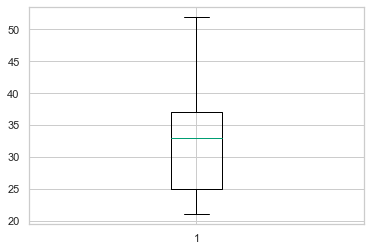

In [223]:
plt.boxplot(nodos[nodos.n_type=='person'].n_age.dropna(), whis=3)

In [224]:
outliers = nodos[nodos.n_age > (nodos.n_age.mean() + 3 * nodos.n_age.std())]
display(outliers)

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

(array([21.,  5., 10.,  4.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([ 2. ,  4.5,  7. ,  9.5, 12. , 14.5, 17. , 19.5, 22. , 24.5, 27. ]),
 <a list of 10 Patch objects>)

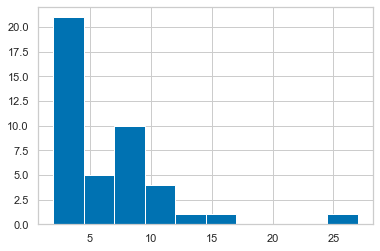

In [225]:
plt.hist(nodos[nodos.n_type=='person'].n_experience.dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x21cfa1baef0>,
 'caps': [<matplotlib.lines.Line2D at 0x21cfa1c4630>,
 'boxes': [<matplotlib.lines.Line2D at 0x21cfa1baa90>],
 'medians': [<matplotlib.lines.Line2D at 0x21cfa1c4d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x21cfa1c4e48>],
 'means': []}

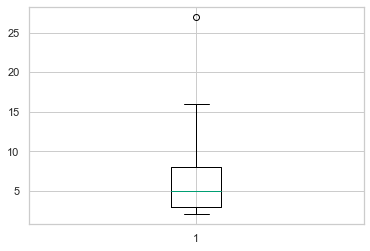

In [226]:
plt.boxplot(nodos[nodos.n_type=='person'].n_experience.dropna(), whis=3)

In [227]:
outliers = nodos[nodos.n_experience > (nodos.n_experience.mean() + 3 * nodos.n_experience.std())]
display(outliers)

Campo                                               n_id name_node_a  n_type  \
1      f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L  person   

Campo n_category n_gender  n_age  n_experience  n_idweirdness  \
1         senior     male   52.0          27.0              0   

Campo  name_node_aweirdness  n_typeweirdness  n_categoryweirdness  \
1                         0                0                    0   

Campo  n_genderweirdness  n_ageweirdness  n_experienceweirdness  
1                      0               0                      0

In [228]:
nodos[nodos.n_experience == 27]

Campo                                               n_id name_node_a  n_type  \
1      f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L  person   

Campo n_category n_gender  n_age  n_experience  n_idweirdness  \
1         senior     male   52.0          27.0              0   

Campo  name_node_aweirdness  n_typeweirdness  n_categoryweirdness  \
1                         0                0                    0   

Campo  n_genderweirdness  n_ageweirdness  n_experienceweirdness  
1                      0               0                      0

Outliers: todos los valores están dentro de 3 desviaciones estándares. Hay una sola persona que cae fuera de 2 DS, con 27 años de experiencia, pero hemos decidido mantener el dato dado el tamaño de la muestra analizada. Utilizamos el criterio de 3 DS a pesar de que los datos muestrales no se distribuyan normal, por convención y falta de un mejor criterio.

g.

In [229]:
datos_faltantes_nodos_cuenta = nodos.isnull().sum()
datos_faltantes_nodos_cuenta

Campo
n_id                     0
name_node_a              0
n_type                   0
n_category               0
n_gender                 0
n_age                    0
n_experience             0
n_idweirdness            0
name_node_aweirdness     0
n_typeweirdness          0
n_categoryweirdness      0
n_genderweirdness        0
n_ageweirdness           0
n_experienceweirdness    0
dtype: int64

In [230]:
nodos[(nodos.n_type == "person") & (nodos.n_category == "NaN")]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [231]:
nodos[(nodos.n_type == "person") & (nodos.n_gender == "NaN")]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [232]:
nodos[(nodos.n_type == "person") & (nodos.n_age == "NaN")]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [233]:
nodos[(nodos.n_type == "person") & (nodos.n_experience == "NaN")]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [234]:
nodos[nodos.n_type.isnull()]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [235]:
nodos = nodos[nodos['name_node_a'] != 'Perfiles']
nodos.head(5)

Campo                                               n_id name_node_a  n_type  \
0      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
1      f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L  person   
2      55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...     Dario O  person   
3      eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...      Luis D  person   
4      40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...   Edgardo O  person   

Campo   n_category n_gender  n_age  n_experience  n_idweirdness  \
0           junior     male   29.0           3.0              0   
1           senior     male   52.0          27.0              0   
2      semi-senior     male   34.0           3.0              0   
3           senior     male   33.0           8.0              0   
4           senior     male   42.0           9.0              0   

Campo  name_node_aweirdness  n_typeweirdness  n_categoryweirdness  \
0                         0                0                    0   
1                         0                0                    0   
2                         0                0                    0   
3                         0                0                    0   
4                         0                0                    0   

Campo  n_genderweirdness  n_ageweirdness  n_experienceweirdness  
0                      0               0                      0  
1                      0               0                      0  
2                      0               0                      0  
3                      0               0                      0  
4                      0               0                      0

In [236]:
nodos[(nodos.n_experience == "NaN") & (nodos.n_age != "NaN")]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [237]:
nodos[(nodos.n_age == "0")]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [238]:
nodos[nodos.n_category.isnull()].head()

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [239]:
nodos[nodos.n_age == 0]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [240]:
nodos[nodos.n_age == 0].replace(0, 'NaN')

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

h.
## PREPARAMOS EL DATA SET 1 y 2

In [241]:
#Recargamos los datos 
nodos = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/nodes3.csv')

# El segundo archivo posee la relación que existen entre los nodos es decir un nodo persona tiene conocimientos vinculados que es lo que sabe
relaciones = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/relationships3.csv')

In [242]:
nodos.columns = nodos.columns.str.replace('.', '_')
nodos[nodos.n_age == 0].replace(0, 'NaN')

n_id       name_node_a  \
29   eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...             Team3   
30   73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...             Team2   
53   4cd45b1d7210ec9b517bd44c201454ba-a87ff679a2f3e...             Team1   
89   2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...        SQL Server   
92   202a4729f08cfad5658fb7a6fb4ab47a-a87ff679a2f3e...              java   
93   bbbe1fbd5a476cc46c35ea4b051c1a36-a87ff679a2f3e...            phyton   
100  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
101  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
102  ac894b03f495d68a60f2d786e79aa1e3-a87ff679a2f3e...    Data Architect   
103  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
104  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
105  a8cea7ec2709db07e628b80e2dafa2b6-a87ff679a2f3e...     Data Engineer   

           n_type  n_category  n_gender n_age n_experience  
29           team         NaN       NaN   NaN          NaN  
30           team         NaN       NaN   NaN          NaN  
53           team         NaN       NaN   NaN          NaN  
89   technologies         NaN       NaN   NaN          NaN  
92   technologies         NaN       NaN   NaN          NaN  
93   technologies         NaN       NaN   NaN          NaN  
100         skill         NaN       NaN   NaN          NaN  
101         skill         NaN       NaN   NaN          NaN  
102         skill         NaN       NaN   NaN          NaN  
103         skill         NaN       NaN   NaN          NaN  
104         skill         NaN       NaN   NaN          NaN  
105         skill         NaN       NaN   NaN          NaN

In [243]:
df_1 = nodos.merge(relaciones, left_on='n_id', right_on='id_node_a')
df_1 = df_1[df_1['n_type']=='person'][['name_node_a_x', 'name_node_b', 'n_category', 'n_age', 'n_experience']]

In [244]:
df2 = nodos[nodos.n_type=='skill'].merge(relaciones, left_on='n_id', right_on='id_node_b')
df2 = df2[['name_node_a_x', 'n_type', 'name_node_a_y', 'id_node_a', 'id_node_b']]
df2.sample(3)

name_node_a_x n_type name_node_a_y  \
10             DBA  skill       Dario O   
12             DBA  skill        Gastón   
3   Data Scientist  skill      Hernan U   

                                            id_node_a  \
10  55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...   
12  f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...   
3   39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...   

                                            id_node_b  
10  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...  
12  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...  
3   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...

In [245]:
t = nodos[nodos.n_type=='technologies'].merge(relaciones)
t = t[['n_id', 'name_node_a', 'id_node_b']]

df2.merge(t, left_on='id_node_b' , right_on='id_node_b')
display(df2.sample(3))

name_node_a_x n_type name_node_a_y  \
12           DBA  skill        Gastón   
38     Developer  skill    Rircardo I   
36     Developer  skill    Patricia L   

                                            id_node_a  \
12  f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...   
38  f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2...   
36  471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2...   

                                            id_node_b  
12  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...  
38  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...  
36  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...

In [246]:
a = nodos[nodos['n_type']=='technologies']
techs = a['name_node_a'].unique()
a = df2.merge(df_1, left_on='name_node_a_y', right_on='name_node_a_x')
display(a.sample(3))

name_node_a_x_x n_type name_node_a_y  \
76                DBA  skill       Jonatan   
203         Developer  skill    Rircardo I   
216  Technical Leader  skill        Daniel   

                                             id_node_a  \
76   79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...   
203  f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2...   
216  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...   

                                             id_node_b name_node_a_x_y  \
76   720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...         Jonatan   
203  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...      Rircardo I   
216  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...          Daniel   

      name_node_b   n_category  n_age  n_experience  
76     SQL Server       senior   33.0           7.0  
203    SQL Server  semi-senior   22.0           5.0  
216  Google cloud       senior   44.0          11.0

# Introducción al aprendizaje automático

Lo primero que tenemos que entender es la jerarquía de los datos organizados en grafos de acuerdo a lo que necesitemos.
En este caso:
* Skills: nodo tipo skill
* Personas: not tipo person
* Tecnologias: nodo tipo knowledge

Con estas vinculaciones trataremos de responder a la pregunta de la relación entre el conocimiento que poseen las personas y sus años de experiencia.


In [247]:
# Repetimos aquí la carga de los archivos
import pandas as pd
import numpy as np

#Lectura
# Vamos a abrir los archivos que poseen la información
# El primer archivo posee los nodos que contienen a las personas, skills, conocimientos, team  (como se explicó en el dataset)
# Aqui se encuentran todos los features de acuerdo al tipo de nodo
nodos = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/nodes3.csv')

# El segundo archivo posee la relación que existen entre los nodos es decir un nodo persona tiene conocimientos vinculados que es lo que sabe
relaciones = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/relationships3.csv')

#Display HTML
display(nodos.head())
display(relaciones.head())

n.id name_node_a  n.type  \
0  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
1  f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L  person   
2  55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...     Dario O  person   
3  eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...      Luis D  person   
4  40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...   Edgardo O  person   

    n.category n.gender  n.age  n.experience  
0       junior     male   29.0           3.0  
1       senior     male   52.0          27.0  
2  semi-senior     male   34.0           3.0  
3       senior     male   33.0           8.0  
4       senior     male   42.0           9.0

id_node_a name_node_a  \
0  e1e8ce3faf08dd3c935ef958ab7214bb-a87ff679a2f3e...     Airflow   
1  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea   
2  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea   
3  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea   
4  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea   

                                           id_node_b  name_node_b  \
0  263db3933c2cb8e9b139373fdd57defb-a87ff679a2f3e...  Integracion   
1  7e978e6cfaa3e6de95722312e007357f-a87ff679a2f3e...       Hadoop   
2  fdbea0fad95c6f981f32120701d8f1d3-a87ff679a2f3e...      MariaDB   
3  2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...   SQL Server   
4  e9305b36f4ce5b64e3ffdde4cb4414df-a87ff679a2f3e...        MySQL   

                                     id_relationship  
0  099fa6035a5eab7a8dcb3f7c29b9cb78-a87ff679a2f3e...  
1  37a61163e6daf34ffc4cfdd85983981b-c81e728d9d4c2...  
2  d7a45d0731835e6d51b701cce147e296-c81e728d9d4c2...  
3  71bef141a7e6d0aafec0c65f0b4a28d7-c81e728d9d4c2...  
4  44e93078bffadc6bf8d4f6b69285c6f3-c81e728d9d4c2...

In [248]:
nodos['n.type'].unique()

array(['person', 'team', nan, 'technologies', 'skill', 'info'],
      dtype=object)

Trabajemos solo con los nodos Skills, Person y Technologies


In [249]:
#Definimos un dataset de skill
skills = nodos[nodos["n.type"] == "skill"]

# Mejoramos los nombres de las columnas
skills.columns = skills.columns.str.replace('n.id', 'skill_id')
skills.columns = skills.columns.str.replace('name_node_a', 'skill_name')
skills.columns = skills.columns.str.replace('n.type', 'skill_type')
# Extractamos solo las columnas necesarias
skills = skills[['skill_id','skill_name','skill_type']]
skills.sample(3)

skill_id        skill_name  \
100  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
101  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
102  ac894b03f495d68a60f2d786e79aa1e3-a87ff679a2f3e...    Data Architect   
103  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
104  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
105  a8cea7ec2709db07e628b80e2dafa2b6-a87ff679a2f3e...     Data Engineer   

    skill_type  
100      skill  
101      skill  
102      skill  
103      skill  
104      skill  
105      skill

In [250]:
#Definimos un dataset de personas
persons = nodos[nodos["n.type"] == "person"]
# persons['n.id']
#Mejoramos los nombres
persons.columns = persons.columns.str.replace('n.id', 'person_id')
persons.columns = persons.columns.str.replace('name_node_a', 'person_name')
persons.columns = persons.columns.str.replace('n.type', 'person_type')
persons.columns = persons.columns.str.replace('n.category', 'person_category')
persons.columns = persons.columns.str.replace('n.gender', 'person_gender')
persons.columns = persons.columns.str.replace('n.age', 'person_age')
persons.columns = persons.columns.str.replace('n.experience', 'person_experience')

persons.set_index('person_id')
persons.sample(3)

person_id person_name person_type  \
0   d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H      person   
1   f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L      person   
2   55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...     Dario O      person   
3   eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...      Luis D      person   
4   40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...   Edgardo O      person   
5   39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...    Hernan U      person   
6   f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2...  Cristian G      person   
7   db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...     Diego M      person   
8   c720cbe09318399805229024f20a1822-c81e728d9d4c2...   Armando I      person   
9   0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2...    Ursula P      person   
10  d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2...   Esteban Q      person   
11  02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2...    Susana S      person   
12  f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2...  Rircardo I      person   
13  b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2...      Luis U      person   
14  f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2...  Gabriela B      person   
15  044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2...      Hugo S      person   
16  bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2...   Martina S      person   
17  471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2...  Patricia L      person   
18  6f67cd4d1b4109e9d15073ee35bd49fb-c81e728d9d4c2...  Mauricio H      person   
19  9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2...   Gustavo M      person   
20  50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2...     Oscar H      person   
21  f5b3b175e984e125c98e21c71dcddd71-c81e728d9d4c2...    Miguel B      person   
22  6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2...     Karen H      person   
23  3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2...    Natali L      person   
24  ac37b1f5d42e5d18336340a3f089d8b2-c81e728d9d4c2...  Victoria B      person   
25  87f1d3a3fcdd5e8b39fe59e0f2bf0e35-c81e728d9d4c2...     Pablo A      person   
26  a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2...      Juan P      person   
27  57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2...   Mariana T      person   
28  ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...   Luciano M      person   
31  1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...     Marcela      person   
32  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...      Daniel      person   
33  e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...    Leonardo      person   
34  10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...      Matias      person   
35  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...      Lionel      person   
36  f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2...      Miguel      person   
37  822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2...     Luciana      person   
38  a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...     Marcelo      person   
47  79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...     Jonatan      person   
48  6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...       Lucas      person   
49  51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...    Fernando      person   
50  f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...      Gastón      person   
51  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea      person   
52  8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...      Martin      person   

   person_category person_gender  person_age  person_experience  
0           junior          male        29.0                3.0  
1           senior          male        52.0               27.0  
2      semi-senior          male        34.0                3.0  
3           senior          male        33.0                8.0  
4           senior          male        42.0                9.0  
5      semi-senior          male        22.0                7.0  
6           senio

In [251]:
#Definimos un dataset de tecnologias
technologies = nodos[nodos["n.type"] == "technologies"]
#Mejoramos los nombres
technologies.columns = technologies.columns.str.replace('n.id', 'technology_id')
technologies.columns = technologies.columns.str.replace('name_node_a', 'technology_name')
technologies.columns = technologies.columns.str.replace('n.type', 'technology_type')
technologies = technologies.drop(columns='n.category',axis=1)
technologies = technologies.drop(columns='n.gender',axis=1)
technologies = technologies.drop(columns='n.age',axis=1)
technologies = technologies.drop(columns='n.experience',axis=1)
technologies.sample(3)

technology_id technology_name  \
62  0d19f40ecc4c80ff14c2c225998be837-a87ff679a2f3e...           Spark   
91  7f85fb3ca43d29a9100c4519e12f2fcd-a87ff679a2f3e...           scala   
84  033b8b21e9a6bb06969eaf9e9f5b3abd-a87ff679a2f3e...       In-memory   

   technology_type  
62    technologies  
91    technologies  
84    technologies

In [252]:
#vamos a unir los dataset para analizarlos 
resultante = skills.merge(relaciones, left_on='skill_id', right_on='id_node_b')
resultante = resultante[['skill_id','skill_name','skill_type','id_node_a']]
resultante.set_index('id_node_a')
resultante.sample(3)

skill_id skill_name skill_type  \
23  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...  Developer      skill   
19  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...        DBA      skill   
34  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...  Developer      skill   

                                            id_node_a  
23  f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2...  
19  0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2...  
34  50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2...

In [253]:
# Vamos a vincular con las personas
resultante = resultante.merge(persons, left_on='id_node_a', right_on='person_id')
resultante.merge(persons, left_on='id_node_a', right_on='person_id').sample(3)


skill_id        skill_name  \
38  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
10  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
15  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   

   skill_type                                          id_node_a  \
38      skill  40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...   
10      skill  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   
15      skill  a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...   

                                          person_id_x person_name_x  \
38  40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...     Edgardo O   
10  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   
15  a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...       Marcelo   

   person_type_x person_category_x person_gender_x  person_age_x  \
38        person            senior            male          42.0   
10        person            junior            male          29.0   
15        person            senior            male          41.0   

    person_experience_x                                        person_id_y  \
38                  9.0  40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...   
10                  3.0  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   
15                 12.0  a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...   

   person_name_y person_type_y person_category_y person_gender_y  \
38     Edgardo O        person            senior            male   
10       David H        person            junior            male   
15       Marcelo        person            senior            male   

    person_age_y  person_experience_y  
38          42.0                  9.0  
10          29.0                  3.0  
15          41.0                 12.0

In [254]:

# Quitamos la columna que nos sirvió para las relaciones
resultante = resultante.drop(columns='id_node_a',axis=1)
resultante.sample(3)

skill_id        skill_name  \
0   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
2   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
3   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
4   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
5   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
6   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
7   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
8   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
9   720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
10  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
11  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
12  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
13  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
14  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
15  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
16  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
17  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
18  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
19  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
20  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
21  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
22  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
23  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
24  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
25  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
26  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
27  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
28  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
29  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
30  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
31  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
32  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
33  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
34  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
35  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
36  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
37  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
38  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
39  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
40  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
41  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
42  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   

   skill_type                                          person_id person_name  \
0       skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...     Diego M   
1       skill  51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...    Fernando   
2       skill  9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2...   Gustavo M   
3       skill  39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...    Hernan U   
4       skill  044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2...      Hugo S   
5       skill  ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...   Luciano M   
6       skill  57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2...   Mariana T   
7       skill  8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...      Martin   
8       skill  3c6052e0f

In [255]:
# Vamos a vincular con las relaciones de las tecnologias
resultante = resultante.merge(relaciones[['id_node_a','id_node_b']], left_on='person_id', right_on='id_node_a')
relaciones["name_node_a"].unique()
resultante = resultante.merge(technologies, left_on='id_node_b', right_on='technology_id')
resultante.sample(3)

skill_id        skill_name  \
0    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
2    720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
3    720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
4    720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
5    7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
6    7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
7    7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
8    7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
9    7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
10   7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
11   7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
12   4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13   4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
14   4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
15   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
16   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
17   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
18   7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
19   7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
20   4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
21   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
22   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
23   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
24   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
25   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
26   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
27   720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
28   720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
29   720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
..                                                 ...               ...   
190  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
191  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
192  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
193  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
194  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
195  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
196  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
197  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
198  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
199  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
200  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
201  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
202  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
203  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
204  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
205  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
206  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
207  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
208  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
209  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
210  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
211  4bc67c9e6001c

In [256]:
# Quitamos la columna que nos sirvió para las relaciones
resultante = resultante.drop(columns='id_node_a',axis=1)
resultante = resultante.drop(columns='id_node_b',axis=1)
resultante.sample(3) 

skill_id        skill_name  \
0    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
2    720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
3    720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
4    720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
5    7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
6    7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
7    7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
8    7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
9    7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
10   7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
11   7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
12   4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13   4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
14   4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
15   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
16   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
17   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
18   7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
19   7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
20   4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
21   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
22   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
23   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
24   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
25   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
26   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
27   720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
28   720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
29   720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
..                                                 ...               ...   
190  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
191  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
192  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
193  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
194  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
195  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
196  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
197  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
198  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
199  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
200  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
201  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
202  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
203  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
204  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
205  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
206  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
207  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
208  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
209  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
210  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
211  4bc67c9e6001c

In [469]:
# Calculamos la cantidad de tecnologias conocidas por cada persona y la almacenamos en el dataset de trabajo
dataset1 = resultante.groupby(['skill_name','person_gender', 'person_category','person_name','person_age','person_experience']).size().to_frame(name='Knowledge').reset_index()
dataset1.sample(3)

skill_name person_gender person_category person_name  person_age  \
29         Developer          male     semi-senior   Armando I        23.0   
14    Data Scientist          male     semi-senior      Hugo S        23.0   
42  Technical Leader          male          senior  Mauricio H        37.0   

    person_experience  Knowledge  
29                8.0          4  
14                5.0          5  
42                8.0          4

In [470]:
#Usaremos este dataset para avanzar con los aspectos de Aprendizaje Automático
dataset1.sample(3)

skill_name person_gender person_category person_name  person_age  \
38  Technical Leader          male     semi-senior      Lionel        35.0   
27         Developer          male          junior      Miguel        24.0   
15    Data Scientist          male          senior     Diego M        35.0   

    person_experience  Knowledge  
38                3.0         13  
27                2.0          4  
15               11.0          5

In [259]:
#Listamos las tecnologías para crear columnas adicionales
newColumns = resultante['technology_name'].unique()
newColumns

array(['Docker', 'Hadoop', 'java', 'scala', 'Spark', 'AWS Lambda',
       'phyton', 'Kubernetes', 'Linux', 'MySQL', 'SQL Server', 'R',
       'Google cloud', 'PostgreSQL', 'AWS', 'MongoDB', 'Vertica', 'ODI',
       'Golden Gate', 'Oracle', 'pentaho', 'windows', 'SQL', 'MariaDB',
       'Oracle Cloud', 'Redis', 'Azure', 'unix', 'S3', 'EC2', 'talend',
       'neo4j'], dtype=object)

In [471]:
#Creamos un dataframe con los nombres de las nuevas columnas
dataTechnologies = pd.DataFrame(resultante,
 columns=newColumns, index=resultante['skill_id'])
dataTechnologies.sample(3)

Docker  Hadoop  java  \
skill_id                                                                   
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...     NaN     NaN   NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...     NaN     NaN   NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...     NaN     NaN   NaN   

                                                    scala  Spark  AWS Lambda  \
skill_id                                                                       
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...    NaN    NaN         NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...    NaN    NaN         NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...    NaN    NaN         NaN   

                                                    phyton  Kubernetes  Linux  \
skill_id                                                                        
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...     NaN         NaN    NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...     NaN         NaN    NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...     NaN         NaN    NaN   

                                                    MySQL  SQL Server   R  \
skill_id                                                                    
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...    NaN         NaN NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...    NaN         NaN NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...    NaN         NaN NaN   

                                                    Google cloud  PostgreSQL  \
skill_id                                                                       
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...           NaN         NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...           NaN         NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...           NaN         NaN   

                                                    AWS  MongoDB  Vertica  \
skill_id                                                                    
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...  NaN      NaN      NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...  NaN      NaN      NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...  NaN      NaN      NaN   

                                                    ODI  Golden Gate  Oracle  \
skill_id                                                                       
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...  NaN          NaN     NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...  NaN          NaN     NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...  NaN          NaN     NaN   

                                                    pentaho  windows  SQL  \
skill_id                                                                    
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...      NaN      NaN  NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...      NaN      NaN  NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...      NaN      NaN  NaN   

                                                    MariaDB  Oracle Cloud  \
skill_id                                                                    
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...      NaN           NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...      NaN           NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...      NaN           NaN   

                                                    Redis  Azure  unix  S3  \
skill_id                                                                     
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...    NaN    NaN   NaN NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...    NaN    NaN   NaN NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...    NaN    NaN   NaN NaN   

                                                    EC2  talend  neo4j  
skill_id                                              

In [261]:
#Creamos un dataset para indicar las tecnologias
dataset2 = resultante.merge(dataTechnologies, left_on='skill_id', right_on='skill_id')
dataset2.sample(3)

skill_id        skill_name  \
0      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
2      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
3      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
4      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
5      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
6      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
7      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
8      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
9      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
10     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
11     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
12     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
13     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
14     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
15     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
16     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
17     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
18     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
19     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
20     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
21     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
22     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
23     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
24     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
25     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
26     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
27     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
28     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
29     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
...                                                  ...               ...   
13360  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13361  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13362  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13363  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13364  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13365  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13366  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13367  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13368  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13369  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13370  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13371  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13372  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13373  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13374  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13375  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13376  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13377  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13378  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13379  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Le

In [262]:
# Eliminamos los duplicados 
dataset2 = dataset2.drop_duplicates()
dataset2.sample(3)
  

skill_id        skill_name  \
0      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
47     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
94     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
141    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
188    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
235    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
282    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
329    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
376    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
423    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
470    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
517    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
564    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
611    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
658    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
705    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
752    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
799    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
846    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
893    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
940    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
987    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1034   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1081   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1128   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1175   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1222   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1269   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1316   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1363   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
...                                                  ...               ...   
12014  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12057  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12100  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12186  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12229  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12315  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12358  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12401  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12444  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12487  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12530  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12573  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12616  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12659  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12702  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12745  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12788  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12831  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12874  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12917  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Le

In [263]:
#Verficamos los conocimientos de una persona
dataset2[dataset2['person_name']=='Matias']


skill_id skill_name skill_type  \
5435  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...  Developer      skill   
7155  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...  Developer      skill   
8015  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...  Developer      skill   
8875  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...  Developer      skill   

                                              person_id person_name  \
5435  10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...      Matias   
7155  10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...      Matias   
8015  10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...      Matias   
8875  10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...      Matias   

     person_type person_category person_gender  person_age  person_experience  \
5435      person          junior          male        25.0                2.0   
7155      person          junior          male        25.0                2.0   
8015      person          junior          male        25.0                2.0   
8875      person          junior          male        25.0                2.0   

      ... SQL MariaDB Oracle Cloud  Redis  Azure  unix  S3  EC2  talend  neo4j  
5435  ... NaN     NaN          NaN    NaN    NaN   NaN NaN  NaN     NaN    NaN  
7155  ... NaN     NaN          NaN    NaN    NaN   NaN NaN  NaN     NaN    NaN  
8015  ... NaN     NaN          NaN    NaN    NaN   NaN NaN  NaN     NaN    NaN  
8875  ... NaN     NaN          NaN    NaN    NaN   NaN NaN  NaN     NaN    NaN  

[4 rows x 45 columns]

###Dataset
Trabajar con el dataset1 (donde el conocimiento está resumido en la columna knowlegde) y dataset2 (donde el conocimiento está armado como columnas individuales) para analizar posibles resultados


In [264]:
dataset1.sample(3)

skill_name person_gender person_category person_name  person_age  \
0                DBA        female          junior   Martina S        33.0   
1                DBA        female          junior    Ursula P        39.0   
2                DBA          male          junior     David H        29.0   
3                DBA          male     semi-senior     Dario O        34.0   
4                DBA          male     semi-senior      Gastón        27.0   
5                DBA          male          senior     Jonatan        33.0   
6                DBA          male          senior       Lucas        35.0   
7                DBA          male          senior      Luis U        41.0   
8                DBA          male          senior     Marcelo        41.0   
9     Data Scientist        female     semi-senior   Mariana T        32.0   
10    Data Scientist        female     semi-senior    Natali L        24.0   
11    Data Scientist          male     semi-senior    Fernando        28.0   
12    Data Scientist          male     semi-senior   Gustavo M        31.0   
13    Data Scientist          male     semi-senior    Hernan U        22.0   
14    Data Scientist          male     semi-senior      Hugo S        23.0   
15    Data Scientist          male          senior     Diego M        35.0   
16    Data Scientist          male          senior   Luciano M        26.0   
17    Data Scientist          male          senior      Martin        34.0   
18         Developer        female          junior  Gabriela B        22.0   
19         Developer        female          junior     Marcela        23.0   
20         Developer        female          junior  Patricia L        39.0   
21         Developer        female          junior  Victoria B        21.0   
22         Developer        female     semi-senior      Andrea        27.0   
23         Developer        female     semi-senior     Luciana        34.0   
24         Developer        female          senior     Karen H        25.0   
25         Developer          male          junior   Esteban Q        38.0   
26         Developer          male          junior      Matias        25.0   
27         Developer          male          junior      Miguel        24.0   
28         Developer          male          junior     Pablo A        22.0   
29         Developer          male     semi-senior   Armando I        23.0   
30         Developer          male     semi-senior     Oscar H        33.0   
31         Developer          male     semi-senior  Rircardo I        22.0   
32         Developer          male          senior  Cristian G        37.0   
33         Developer          male          senior      Juan P        45.0   
34         Developer          male          senior    Leonardo        45.0   
35         Developer          male          senior    Miguel B        26.0   
36         Developer          male          senior    Walter L        52.0   
37  Technical Leader        female          senior    Susana S        36.0   
38  Technical Leader          male     semi-senior      Lionel        35.0   
39  Technical Leader          male          senior      Daniel        44.0   
40  Technical Leader          male          senior   Edgardo O        42.0   
41  Technical Leader          male          senior      Luis D        33.0   
42  Technical Leader          male          senior  Mauricio H        37.0   

    person_experience  Knowledge  
0                 3.0          4  
1                 5.0          5  
2                 3.0          5  
3                 3.0          5  
4                 3.0          3  
5                 7.0          6  
6                 6.0          4  
7                 8.0          5  
8                12.0          7  
9                 4.0          5  
10                4.0          4  
11                4.0          9  
12                4.0          5  
13                7.0          5  
14                5.0          5  
15               

In [265]:
dataset2.sample(3)

skill_id        skill_name  \
0      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
47     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
94     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
141    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
188    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
235    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
282    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
329    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
376    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
423    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
470    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
517    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
564    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
611    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
658    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
705    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
752    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
799    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
846    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
893    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
940    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
987    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1034   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1081   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1128   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1175   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1222   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1269   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1316   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1363   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
...                                                  ...               ...   
12014  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12057  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12100  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12186  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12229  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12315  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12358  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12401  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12444  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12487  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12530  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12573  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12616  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12659  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12702  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12745  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12788  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12831  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12874  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12917  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Le

### Preprocesamiento
En el dataset2, colocar valores 1 o 0 a quienes tengan conocimiento de las tecnologias y fusionar las personas para tener una sola fila persona con sus conocimientos

# Dataset para Problema de Clasificación Binario
Si bien nuestro problema original es uno de clasificación múltiple, comenzaremos por tratarlo como un problema de clasificación binario, en donde nuestro objetivo será:

0 = Corresponde a una persona con poca experiencia (person_category = junior o person_category = semi-senior

1 = Corresponde a una persona con poca experiencia (person_category = senior

Es decir, queremos identificar las personas con alto perfil de las que tienen poco . En base a esta definición, deben transformar el dataset para adaptarlo a un problema de clasifiación binario.

¿Cómo luce ahora el balance de clases? ¿Tomarán alguna decisión al respecto?


In [266]:
ds_bin = df_1
ds_bin['n_category'].unique()

array(['junior', 'senior', 'semi-senior'], dtype=object)

# Dataset binarizado
Generamos dummies para la columna n_categoria. Si nos quedamos únicamente con la clasificación "Senior SI/NO" habremos binarizado el dataset.
Si la persona corresponde a la categoria senior se le asigna un 1, caso contrario se le asigna un 0.

In [267]:
aux = ds_bin['n_category'].str.get_dummies()
display(aux)

junior  semi-senior  senior
0         1            0       0
1         1            0       0
2         1            0       0
3         1            0       0
4         1            0       0
5         1            0       0
6         0            0       1
7         0            0       1
8         0            0       1
9         0            0       1
10        0            1       0
11        0            1       0
12        0            1       0
13        0            1       0
14        0            1       0
15        0            1       0
16        0            0       1
17        0            0       1
18        0            0       1
19        0            0       1
20        0            0       1
21        0            0       1
22        0            0       1
23        0            0       1
24        0            0       1
25        0            0       1
26        0            1       0
27        0            1       0
28        0            1       0
29        0            1       0
..      ...          ...     ...
270       0            1       0
271       0            1       0
272       0            1       0
273       0            1       0
274       0            1       0
275       0            1       0
276       0            1       0
277       0            1       0
278       0            1       0
279       0            1       0
280       0            1       0
281       0            1       0
282       0            1       0
283       0            1       0
284       0            1       0
285       0            1       0
286       0            1       0
287       0            1       0
288       0            1       0
289       0            1       0
290       0            1       0
291       0            1       0
292       0            1       0
293       0            1       0
294       0            1       0
295       0            0       1
296       0            0       1
297       0            0       1
298       0            0       1
299       0            0       1

[263 rows x 3 columns]

In [268]:
ds_bin = pd.concat([ds_bin, aux], axis=1)
ds_bin = ds_bin.drop(['junior','semi-senior'], axis=1)
display(ds_bin.sample(3))

name_node_a_x       name_node_b   n_category  n_age  n_experience  senior
0         David H               AWS       junior   29.0           3.0       0
1         David H               DBA       junior   29.0           3.0       0
2         David H       Golden Gate       junior   29.0           3.0       0
3         David H              java       junior   29.0           3.0       0
4         David H            Oracle       junior   29.0           3.0       0
5         David H        SQL Server       junior   29.0           3.0       0
6        Walter L               AWS       senior   52.0          27.0       1
7        Walter L         Developer       senior   52.0          27.0       1
8        Walter L              java       senior   52.0          27.0       1
9        Walter L             Linux       senior   52.0          27.0       1
10        Dario O               DBA  semi-senior   34.0           3.0       0
11        Dario O            Docker  semi-senior   34.0           3.0       0
12        Dario O       Golden Gate  semi-senior   34.0           3.0       0
13        Dario O            Oracle  semi-senior   34.0           3.0       0
14        Dario O        SQL Server  semi-senior   34.0           3.0       0
15        Dario O           Vertica  semi-senior   34.0           3.0       0
16         Luis D               AWS       senior   33.0           8.0       1
17         Luis D              java       senior   33.0           8.0       1
18         Luis D             Linux       senior   33.0           8.0       1
19         Luis D             Linux       senior   33.0           8.0       1
20         Luis D  Technical Leader       senior   33.0           8.0       1
21      Edgardo O              java       senior   42.0           9.0       1
22      Edgardo O             Linux       senior   42.0           9.0       1
23      Edgardo O             Linux       senior   42.0           9.0       1
24      Edgardo O           MariaDB       senior   42.0           9.0       1
25      Edgardo O  Technical Leader       senior   42.0           9.0       1
26       Hernan U               AWS  semi-senior   22.0           7.0       0
27       Hernan U    Data Scientist  semi-senior   22.0           7.0       0
28       Hernan U            Hadoop  semi-senior   22.0           7.0       0
29       Hernan U              java  semi-senior   22.0           7.0       0
..            ...               ...          ...    ...           ...     ...
270      Fernando        AWS Lambda  semi-senior   28.0           4.0       0
271      Fernando            phyton  semi-senior   28.0           4.0       0
272      Fernando            Docker  semi-senior   28.0           4.0       0
273      Fernando        Kubernetes  semi-senior   28.0           4.0       0
274      Fernando             Linux  semi-senior   28.0           4.0       0
275      Fernando             Spark  semi-senior   28.0           4.0       0
276      Fernando             MySQL  semi-senior   28.0           4.0       0
277      Fernando        SQL Server  semi-senior   28.0           4.0       0
278      Fernando                 R  semi-senior   28.0           4.0       0
279        Gastón               DBA  semi-senior   27.0           3.0       0
280        Gastón               ODI  semi-senior   27.0           3.0       0
281        Gastón           pentaho  semi-senior   27.0           3.0       0
282        Gastón       Golden Gate  semi-senior   27.0           3.0       0
283        Andrea            Hadoop  semi-senior   27.0           3.0       0
284        Andrea           MariaDB  semi-senior   27.0           3.0       0
285        Andrea        SQL Server  semi-senior   27.0           3.0       0
286        Andrea             MySQL  semi-senior   27.0           3.0       0
287        Andrea            Docker  semi-senior   27.0           3.0       0
288        Andrea             Linux  semi-senior   27.0           3.0       0
289        Andrea         

# Label encoder
Codificamos las columnas name_node_a_x y name_node_b para poder compatibilizar nuestro dataset con scikitlear

In [269]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for column in ['name_node_a_x', 'name_node_b', 'n_category']:
    ds_bin[column] = lb_make.fit_transform(ds_bin[column])
ds_bin.head()

name_node_a_x  name_node_b  n_category  n_age  n_experience  senior
0              5            0           0   29.0           3.0       0
1              5            3           0   29.0           3.0       0
2              5            8           0   29.0           3.0       0
3              5           28           0   29.0           3.0       0
4              5           17           0   29.0           3.0       0

In [270]:
from sklearn.utils import shuffle
ds_bin = shuffle(ds_bin)
ds_bin['senior'] = pd.to_numeric(ds_bin['senior'], downcast='float')
ds_bin.sample(3)

name_node_a_x  name_node_b  n_category  n_age  n_experience  senior
43               1            0           1   23.0           8.0     0.0
270              9            1           1   28.0           4.0     0.0
209             18           28           2   45.0          16.0     1.0
53              40           27           0   39.0           5.0     0.0
111             35            5           1   33.0           2.0     0.0
287              0            6           1   27.0           3.0     0.0
233             32           15           0   24.0           2.0     0.0
12               4            8           1   34.0           3.0     0.0
185             25            5           0   23.0           3.0     0.0
49              40            6           0   39.0           5.0     0.0
207             18           12           2   45.0          16.0     1.0
41               6           32           2   35.0          11.0     1.0
286              0           15           1   27.0           3.0     0.0
74              24           12           2   41.0           8.0     1.0
291              0            1           1   27.0           3.0     0.0
30              13           12           1   22.0           7.0     0.0
219             19           24           1   35.0           3.0     0.0
21               7           28           2   42.0           9.0     1.0
217             19           31           1   35.0           3.0     0.0
47               1           12           1   23.0           8.0     0.0
68              38           28           1   22.0           5.0     0.0
104             31           26           2   37.0           8.0     1.0
208             18           15           2   45.0          16.0     1.0
221             19           15           1   35.0           3.0     0.0
203              3           25           2   44.0          11.0     1.0
81              10           12           0   22.0           4.0     0.0
186             25           35           0   23.0           3.0     0.0
189             25           31           0   23.0           3.0     0.0
106             12            9           1   31.0           4.0     0.0
298             28           31           2   34.0           5.0     1.0
..             ...          ...         ...    ...           ...     ...
288              0           12           1   27.0           3.0     0.0
237             21           28           1   34.0           4.0     0.0
5                5           24           0   29.0           3.0     0.0
263             15           28           2   33.0           7.0     1.0
193              3            9           2   44.0          11.0     1.0
245             26           17           2   41.0          12.0     1.0
128             41            5           0   21.0           2.0     0.0
63              39           24           2   36.0           8.0     1.0
37               6            4           2   35.0          11.0     1.0
29              13           28           1   22.0           7.0     0.0
142             16           19           2   45.0          11.0     1.0
78              10            6           0   22.0           4.0     0.0
45               1            5           1   23.0           8.0     0.0
229             19           26           1   35.0           3.0     0.0
141             16            6           2   45.0          11.0     1.0
239             21            5           1   34.0           4.0     0.0
129             41            6           0   21.0           2.0     0.0
240             26            3           2   41.0          12.0     1.0
296             28           27           2   34.0           5.0     1.0
225             19           17           1   35.0           3.0     0.0
145             27            4           1   32.0           4.0     0.0
64              39           26           2   36.0           8.0     1.0
271              9           31           1   28.0           4.

# Scitkit Learn
Implementamos scitkit learn para el pipeline tradicional: preparación dataset en train/test, selección de modelo, entrenamiento, validación y determinación de accuracy.

In [271]:
from sklearn.model_selection import train_test_split
X, y = ds_bin[['n_age', 'n_experience']], ds_bin['senior']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
#Chequeamos shape para comprobar que esta todo en orden
X_train.shape, X_test.shape

((210, 2), (53, 2))

## Aplicación de Modelos de Clasificación
Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de clasificación para ambos datasets, utilizando la librería Scikit-Learn:

1. Perceptron. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
2. K Nearest Neighbors ó K Vecinos Más Cercanos
3. Regresión Lineal.
4. Regresión Logística. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
Para cada uno de ellos, se pide responder las siguientes consignas:

Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?
Obtener accuracy o exactitud.
De estos tres tipos de modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

Elegir el modelo que consideren que mejor aplica a nuestro problema. Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

1. Descripción de la Hipótesis
¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

2. Selección de Regularizador
¿Utilizarán algún regularizador?¿Cuál?

3. Selección de Función de Costo
¿Cuál será la función de costo utilizada?

4. Justificación de las Selecciones
¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

Utilizar el método Grid Search, o de búsqueda exahustiva, con cross-validation para profundizar en la búsqueda y selección de hiperparámetros.
Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
Accuracy o exactitud
Reporte de clasificación
Confusion matrix o matriz de confusión (graficar como heatmap)
Curva ROC y área bajo la curva (AUC).
Entregables
El entregable de este práctico consiste en esta misma Notebook, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

## 1.Perceptron

In [272]:
from sklearn.linear_model import Perceptron
model = Perceptron(tol=1e-3, random_state=0)

model.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [273]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [274]:
from sklearn.metrics import classification_report

print(f"Report para y_train")
print(classification_report(y_train, y_train_pred))
print(f"\n*2")
print(f"Report para y_test")
print(classification_report(y_test, y_test_pred))

Report para y_train
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85       125
         1.0       0.77      0.79      0.78        85

    accuracy                           0.82       210
   macro avg       0.81      0.81      0.81       210
weighted avg       0.82      0.82      0.82       210


*2
Report para y_test
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        32
         1.0       0.86      0.86      0.86        21

    accuracy                           0.89        53
   macro avg       0.88      0.88      0.88        53
weighted avg       0.89      0.89      0.89        53



In [275]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [276]:
# Always scale the input. The most convenient way is to use a pipeline. 
model = make_pipeline(StandardScaler(),
                    SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None))

model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=1,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='constant', loss='perceptron',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty=None, power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [277]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [278]:
print(f"Report para y_train")
print(classification_report(y_train, y_train_pred))
print(f"\n*2")
print(f"Report para y_test")
print(classification_report(y_test, y_test_pred))

Report para y_train
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       125
         1.0       1.00      0.68      0.81        85

    accuracy                           0.87       210
   macro avg       0.91      0.84      0.86       210
weighted avg       0.89      0.87      0.87       210


*2
Report para y_test
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93        32
         1.0       1.00      0.76      0.86        21

    accuracy                           0.91        53
   macro avg       0.93      0.88      0.90        53
weighted avg       0.92      0.91      0.90        53



In [279]:
#Dado que tanto la edad como la expriencia vienen dadas en enteros, cambiamos de float a int
X_train['n_experience']=np.asarray(X_train['n_experience'], dtype=int)
X_train['n_age']=np.asarray(X_train['n_age'], dtype=int)
X_test['n_experience']=np.asarray(X_test['n_experience'], dtype=int)
X_test['n_age']=np.asarray(X_test['n_age'], dtype=int)

In [280]:
#Buscamos armar una matriz X_test_plot a partir de X_test['n_age'] y X_test['n_experience'] para graficar.
#Primero definimos una matriz nula
X_test_plot=np.zeros((2,53))
#Luego, ingresamos los datos supra mencionados
X_test_plot[0,:]=np.matrix( X_test['n_age'])
X_test_plot[1,:]=np.matrix(X_test['n_experience'])

In [281]:
utils.plot_decision_boundary(lambda x: model.predict(x), X_test_plot, y_test)

NameError: name 'utils' is not defined

## 2. K Nearest Neighbors ó K Vecinos Más Cercanos

In [282]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [283]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [284]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [285]:
print(f"Report para y_train")
print(classification_report(y_train, y_train_pred))
print(f"\n*2")
print(f"Report para y_test")
print(classification_report(y_test, y_test_pred))

Report para y_train
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       125
         1.0       1.00      1.00      1.00        85

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210


*2
Report para y_test
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        32
         1.0       1.00      1.00      1.00        21

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



## 3. Regresión Lineal.

In [286]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regr = LinearRegression()

regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [287]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

Coefficients: 
 [0.01437309 0.06124209]
Mean squared error: 0.08
Variance score: 0.65


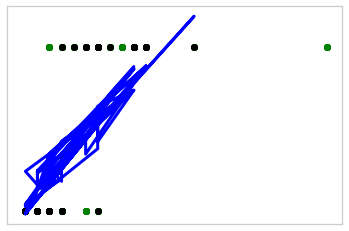

In [288]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))

# Plot outputs
plt.scatter(X_train['n_experience'], y_train,  color='green')
plt.scatter(X_test['n_experience'], y_test,  color='black')
plt.plot(X_test['n_experience'], y_test_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 4. Regresión Logística.

In [289]:
model = SGDClassifier(loss="log", eta0=1, learning_rate="constant", penalty=None)

model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='log',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty=None,
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [290]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [291]:
print(f"Report para y_train")
print(classification_report(y_train, y_train_pred))
print(f"\n*2")
print(f"Report para y_test")
print(classification_report(y_test, y_test_pred))

Report para y_train
              precision    recall  f1-score   support

         0.0       1.00      0.06      0.12       125
         1.0       0.42      1.00      0.59        85

    accuracy                           0.44       210
   macro avg       0.71      0.53      0.36       210
weighted avg       0.77      0.44      0.31       210


*2
Report para y_test
              precision    recall  f1-score   support

         0.0       1.00      0.03      0.06        32
         1.0       0.40      1.00      0.58        21

    accuracy                           0.42        53
   macro avg       0.70      0.52      0.32        53
weighted avg       0.76      0.42      0.26        53



In [292]:
display(model.coef_)
bound = X_test.dot(model.coef_.T)
print(bound)

array([[-16.56681454, 255.13248193]])

               0
133   162.361859
282   318.093453
128   162.361859
185   384.360711
19   1494.354976
13    202.125751
224   185.558937
145   490.391862
198  2077.517462
214    96.094600
188   384.360711
23   1600.386127
142  2060.950647
62   1444.654532
260  1239.222494
119  1371.757010
243  2382.350387
57    390.990975
246  2382.350387
269   556.659121
54    390.990975
293   318.093453
227   185.558937
12    202.125751
197  2077.517462
220   185.558937
1     284.959824
97   -135.840803
63   1444.654532
154  1610.322677
39   2226.618792
48    629.556643
131   162.361859
242  2382.350387
189   384.360711
268   950.956383
196  2077.517462
150   490.391862
68    911.192490
295   712.390715
213    96.094600
84    894.625675
287   318.093453
208  3336.613057
276   556.659121
273   556.659121
286   318.093453
215    96.094600
230   112.661415
46   1660.023121
73   1361.820459
40   2226.618792
20   1494.354976


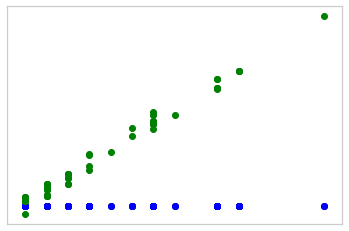

In [293]:
# Plot outputs
#plt.scatter(X_train['n_experience'], y_train,  color='green')
plt.scatter(X_test['n_experience'], y_test,  color='black')
plt.scatter(X_test['n_experience'], y_test_pred, color='blue')
plt.scatter(X_test['n_experience'],bound.T, color='green')


plt.xticks(())
plt.yticks(())

plt.show()

Param Grid aplicado sobre el modelo de Regresión Logística

In [294]:
param_grid = {
    'loss': ['log'],
    'penalty':['None', 'l2'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'eta0':[0.00000001, 0.000001, 0.0001, 0.01]
}

## ParameterGrid

In [295]:
from sklearn.model_selection import ParameterGrid

for params in ParameterGrid(param_grid):
 #   print(params)
    model = SGDClassifier(**params, random_state=0)

## GridSearch
Análisis con GridSearch para regresión logística

In [296]:
from sklearn.model_selection import GridSearchCV

model = model = SGDClassifier(random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=3)
cv.fit(X, y);

In [297]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

print("loss\penalty\alpha\learning_rate\eta0\t| mean\tstd\trank")
for p, m, s, r in zip(params, mean, std, rank):
    print(f"{p['loss']}\t{p['penalty']}\t{p['alpha']}\t{p['learning_rate']}\t{p['eta0']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

loss\penaltylpha\learning_rate\eta0	| mean	std	rank
log	None	0.0001	constant	1e-08	| 0.60	0.00	37
log	l2	0.0001	constant	1e-08	| 0.60	0.00	37
log	None	0.0001	invscaling	1e-08	| 0.60	0.00	37
log	l2	0.0001	invscaling	1e-08	| 0.60	0.00	37
log	None	0.0001	adaptive	1e-08	| 0.60	0.00	37
log	l2	0.0001	adaptive	1e-08	| 0.60	0.00	37
log	None	0.0001	constant	1e-06	| 0.60	0.00	37
log	l2	0.0001	constant	1e-06	| 0.60	0.00	37
log	None	0.0001	invscaling	1e-06	| 0.60	0.00	37
log	l2	0.0001	invscaling	1e-06	| 0.60	0.00	37
log	None	0.0001	adaptive	1e-06	| 0.60	0.00	37
log	l2	0.0001	adaptive	1e-06	| 0.60	0.00	37
log	None	0.0001	constant	0.0001	| 0.85	0.02	7
log	l2	0.0001	constant	0.0001	| 0.85	0.02	7
log	None	0.0001	invscaling	0.0001	| 0.60	0.00	31
log	l2	0.0001	invscaling	0.0001	| 0.60	0.00	31
log	None	0.0001	adaptive	0.0001	| 0.84	0.01	19
log	l2	0.0001	adaptive	0.0001	| 0.84	0.01	19
log	None	0.0001	constant	0.01	| 0.75	0.06	25
log	l2	0.0001	constant	0.01	| 0.75	0.06	25
log	None	0.0001	invscaling	0.01	|

Los mejores modelos tienen un accuracy promedio del 0.06 con una stdv de 0.4, Sin usar función de pérdida, y con una tasa adaptativa de la learnning rate.


### Mezca Aleatória y División en Train/Test
Finalmente, están en condiciones de dividir el dataset en Train y Test, utilizando para este último conjunto un 20% de los datos disponibles. Previo a esta división, es recomendable que mezclen los datos aleatoriamente. De este modo, deberán obtener cuatro conjuntos de datos, para cada uno de los datasets: X_train, X_test, y_train y y_test

## Aplicación de Modelos de Clasificación
Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de clasificación para ambos datasets, utilizando la librería Scikit-Learn:

1. Perceptron. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
2. K Nearest Neighbors ó K Vecinos Más Cercanos
3. Regresión Lineal.
4. Regresión Logística. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
Para cada uno de ellos, se pide responder las siguientes consignas:

Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?
Obtener accuracy o exactitud.
De estos tres tipos de modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

Elegir el modelo que consideren que mejor aplica a nuestro problema. Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

1. Descripción de la Hipótesis
¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

2. Selección de Regularizador
¿Utilizarán algún regularizador?¿Cuál?

3. Selección de Función de Costo
¿Cuál será la función de costo utilizada?

4. Justificación de las Selecciones
¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

Utilizar el método Grid Search, o de búsqueda exahustiva, con cross-validation para profundizar en la búsqueda y selección de hiperparámetros.
Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
Accuracy o exactitud
Reporte de clasificación
Confusion matrix o matriz de confusión (graficar como heatmap)
Curva ROC y área bajo la curva (AUC).
Entregables
El entregable de este práctico consiste en esta misma Notebook, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

# Observaciones de Trabajo
**No trabajaron con el dataset2**
Podemos darlo como válido pero justifiquen porque usaron ese dataset

* No hay una clara declaración de los puntos 1, 2, 3 y 4
* No usaron GridSearch para el modelo seleccionado

433: utils.plot_decision_boundary(lambda x: model.predict(x), Xtrain, y_train.T)
No graficaron  el test.

437: KNeighborsClassifier 
No graficaron.

# Aprendizaje Supervisado


### Preprocesamiento
En el dataset2, colocar valores 1 o 0 a quienes tengan conocimiento de las tecnologias y fusionar las personas para tener una sola fila persona con sus conocimientos

In [298]:
dataset2.sample(3)

skill_id        skill_name  \
0      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
47     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
94     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
141    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
188    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
235    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
282    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
329    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
376    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
423    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
470    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
517    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
564    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
611    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
658    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
705    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
752    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
799    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
846    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
893    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
940    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
987    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1034   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1081   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1128   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1175   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1222   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1269   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1316   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1363   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
...                                                  ...               ...   
12014  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12057  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12100  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12186  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12229  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12315  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12358  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12401  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12444  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12487  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12530  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12573  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12616  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12659  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12702  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12745  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12788  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12831  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12874  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12917  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Le

In [299]:
dataset3 = pd.get_dummies(dataset2, columns=['technology_name'])
dataset3.sample(3)

skill_id        skill_name  \
0      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
47     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
94     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
141    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
188    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
235    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
282    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
329    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
376    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
423    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
470    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
517    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
564    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
611    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
658    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
705    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
752    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
799    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
846    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
893    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
940    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
987    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1034   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1081   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1128   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1175   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1222   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1269   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1316   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1363   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
...                                                  ...               ...   
12014  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12057  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12100  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12186  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12229  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12315  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12358  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12401  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12444  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12487  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12530  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12573  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12616  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12659  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12702  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12745  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12788  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12831  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12874  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
12917  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Le

In [300]:
dataset3 = dataset3.groupby('person_id').max()
dataset3.sample(3)

skill_id  \
person_id                                                                                               
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e7...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e7...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
6f67cd4d1b4109e9d15073ee35bd49fb-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e7...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
87f1d3a3fcdd5e8b39fe59e0f2bf0e35-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
ac37b1f5d42e5d18336340a3f089d8b2-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
c720cbe09318399805229024f20a1822-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...  

# Dataset para Problema de Clasificación Múltiple
Ahora encararemos nuestro problema original es uno de clasificación múltiple,  en donde nuestro objetivo será usar la variable person_category:

1 = person_category = junior

2 = person_category = semi-senior

3 = person_category = senior


Es decir, queremos predecir el perfil de las personas. En base a esta definición.

¿Cómo luce ahora el balance de clases? ¿Tomarán alguna decisión al respecto?

In [301]:
#Primero generamos una función para pasar los valores a numéricos:
mapper = {"semi-senior":2,
                  "senior":3,
                  "junior":1,}

dataset3['person_category'] = dataset3['person_category'].replace(mapper)


In [302]:
dataset3.sample(3)

skill_id  \
person_id                                                                                               
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e7...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e7...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
6f67cd4d1b4109e9d15073ee35bd49fb-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e7...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
87f1d3a3fcdd5e8b39fe59e0f2bf0e35-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
ac37b1f5d42e5d18336340a3f089d8b2-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
c720cbe09318399805229024f20a1822-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...  

In [303]:
dataset3.columns

Index(['skill_id', 'skill_name', 'skill_type', 'person_name', 'person_type',
       'person_category', 'person_gender', 'person_age', 'person_experience',
       'technology_id', 'technology_type', 'Docker', 'Hadoop', 'java', 'scala',
       'Spark', 'AWS Lambda', 'phyton', 'Kubernetes', 'Linux', 'MySQL',
       'SQL Server', 'R', 'Google cloud', 'PostgreSQL', 'AWS', 'MongoDB',
       'Vertica', 'ODI', 'Golden Gate', 'Oracle', 'pentaho', 'windows', 'SQL',
       'MariaDB', 'Oracle Cloud', 'Redis', 'Azure', 'unix', 'S3', 'EC2',
       'talend', 'neo4j', 'technology_name_AWS', 'technology_name_AWS Lambda',
       'technology_name_Azure', 'technology_name_Docker',
       'technology_name_EC2', 'technology_name_Golden Gate',
       'technology_name_Google cloud', 'technology_name_Hadoop',
       'technology_name_Kubernetes', 'technology_name_Linux',
       'technology_name_MariaDB', 'technology_name_MongoDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Or

In [304]:
valid_columns = ['person_category', 'person_age', 'person_experience',
       'technology_name_AWS Lambda', 'technology_name_Azure',
       'technology_name_Docker', 'technology_name_EC2',
       'technology_name_Golden Gate', 'technology_name_Google cloud',
       'technology_name_Hadoop', 'technology_name_Kubernetes',
       'technology_name_Linux', 'technology_name_MariaDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Oracle', 'technology_name_Oracle Cloud',
       'technology_name_PostgreSQL', 'technology_name_R',
       'technology_name_Redis', 'technology_name_S3', 'technology_name_SQL',
       'technology_name_SQL Server', 'technology_name_Spark',
       'technology_name_Vertica', 'technology_name_java',
       'technology_name_neo4j', 'technology_name_pentaho',
       'technology_name_phyton', 'technology_name_talend',
       'technology_name_unix', 'technology_name_windows']

In [305]:
df = dataset3.drop(columns =['skill_id',
                             'skill_name',
                             'skill_type', 'person_name', 'person_type', 'person_gender', 
       'technology_id', 'technology_type', 'AWS Lambda', 'phyton', 'Docker','scala', 'AWS', 'MongoDB',
       'Kubernetes', 'Linux', 'Spark', 'MySQL', 'SQL Server', 'R', 'Vertica',
       'ODI', 'windows', 'Golden Gate', 'Oracle', 'Oracle Cloud', 'SQL',
       'java', 'pentaho', 'Hadoop', 'MariaDB', 'Redis', 'Azure',
       'Google cloud', 'PostgreSQL', 'unix', 'S3', 'EC2', 'talend', 'neo4j'])

In [306]:
df.sample(3)

person_category  \
person_id                                                             
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...                3   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                2   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...                1   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...                1   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...                1   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                2   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                2   
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f...                3   
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f...                1   
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f...                2   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                2   
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e7...                2   
55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2f...                2   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                2   
6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2f...                3   
6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e7...                3   
6f67cd4d1b4109e9d15073ee35bd49fb-c81e728d9d4c2f...                3   
79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e7...                3   
822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2f...                2   
87f1d3a3fcdd5e8b39fe59e0f2bf0e35-c81e728d9d4c2f...                1   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                3   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                2   
a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2f...                3   
a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2f...                3   
ac37b1f5d42e5d18336340a3f089d8b2-c81e728d9d4c2f...                1   
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f...                3   
bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2f...                2   
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f...                1   
c720cbe09318399805229024f20a1822-c81e728d9d4c2f...                2   
d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2f...                1   
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f...                1   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                3   
e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2f...                3   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                3   
eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2f...                3   
f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2f...                2   
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f...                1   
f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2f...                3   
f5b3b175e984e125c98e21c71dcddd71-c81e728d9d4c2f...                3   
f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e7...                2   
f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2f...                3   
f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2f...                3   
f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2f...                1   

                                                    person_age  \
person_id                                                        
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...        36.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...        23.0   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...        39.0   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...        25.0   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...        23.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...        22.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...        24.0   
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f...        42.0   
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f...        39.0   
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f...        33.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...        28.0  

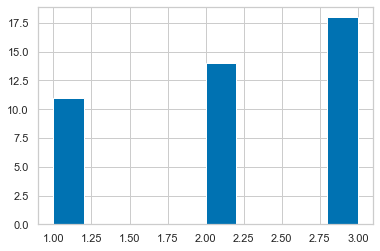

In [307]:
df.person_category.hist()

**BALANCE DE CLASES**: las clases 2 y 3 estan balanceadas, pero dado los pocos datos, la clase 1 no, ya que tiene un 61% de la clase 3.

### Mezca Aleatória y División en Train/Test
Primeramente, deberán mezclar los datos aleatoriamente. Luego, para dividir en Train/Test el dataset, aplicar el split utilizando un 20% de datos para este último.

En este punto, deberán obtener cuatro conjuntos de datos, para ambos datasets: X_train, X_test, y_train y y_test.


In [308]:
from sklearn.model_selection import train_test_split

In [309]:
X, y = df.drop(columns=['person_category']), df['person_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)
X_train.shape, X_test.shape

((34, 34), (9, 34))

In [310]:
X.drop(columns=[])
X.sample(3)

person_age  \
person_id                                                        
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...        36.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...        23.0   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...        39.0   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...        25.0   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...        23.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...        22.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...        24.0   
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f...        42.0   
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f...        39.0   
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f...        33.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...        28.0   
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e7...        27.0   
55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2f...        34.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...        32.0   
6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2f...        25.0   
6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e7...        35.0   
6f67cd4d1b4109e9d15073ee35bd49fb-c81e728d9d4c2f...        37.0   
79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e7...        33.0   
822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2f...        34.0   
87f1d3a3fcdd5e8b39fe59e0f2bf0e35-c81e728d9d4c2f...        22.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...        34.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...        31.0   
a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2f...        41.0   
a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2f...        45.0   
ac37b1f5d42e5d18336340a3f089d8b2-c81e728d9d4c2f...        21.0   
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f...        41.0   
bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2f...        35.0   
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f...        33.0   
c720cbe09318399805229024f20a1822-c81e728d9d4c2f...        23.0   
d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2f...        29.0   
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f...        38.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...        35.0   
e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2f...        45.0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...        26.0   
eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2f...        33.0   
f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2f...        22.0   
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f...        22.0   
f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2f...        44.0   
f5b3b175e984e125c98e21c71dcddd71-c81e728d9d4c2f...        26.0   
f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e7...        27.0   
f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2f...        52.0   
f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2f...        37.0   
f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2f...        24.0   

                                                    person_experience  \
person_id                                                               
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...                8.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                5.0   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...                5.0   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...                2.0   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...                3.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                7.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                4.0   
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f...                9.0   
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f...                2.0   
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f...                2.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                4.0   
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e7...                3.0   
55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2f...         

In [312]:
firstcolumns=['person_category','person_age','person_experience','technology_name_EC2','technology_name_Spark','technology_name_Vertica']

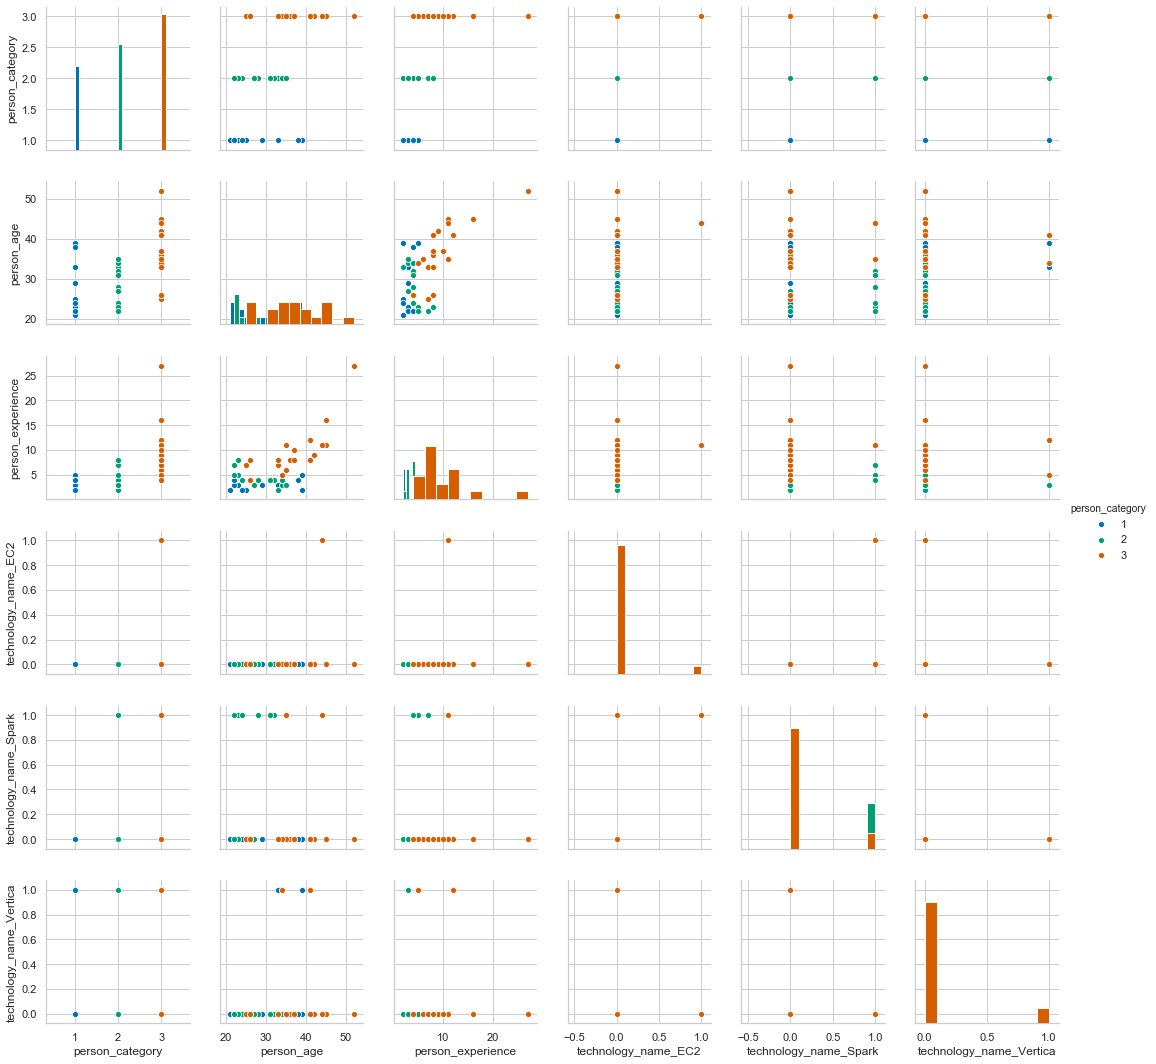

In [313]:
sns.pairplot(df[firstcolumns], hue="person_category", diag_kind = "hist")
#plt.savefig("Correlaciones Pearson.jpg")

##Aplicación de Modelos de Clasificación de Aprendizaje Automático Supervisado
Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de clasificación para el dataset seleccionado, utilizando la librería Scikit-Learn (o la que consideren apropiada):

1. Support Vector Machines (SVM), probando clasificadores con distintos kernels.
2. Random Forest, utilizando parámetros de normalización cuando lo crean adecuado.
3. Red neuronal.

Para cada uno de ellos, se pide responder las siguientes consignas:

* Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
* Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?

De estos tres modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

**Elegir el modelo que consideren que mejor aplica a nuestro problema.** Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

1. Descripción de la Hipótesis
¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

2. Selección de Regularizador
¿Utilizarán algún regularizador?¿Cuál?

3. Selección de Función de Costo
¿Cuál será la función de costo utilizada?

4. Justificación de las Selecciones
¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

* Utilizar el método Grid Search, o de búsqueda exahustiva, con cross-validation para profundizar en la búsqueda y selección de hiperparámetros (fine tuning).
Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
  * Accuracy o exactitud
  * Reporte de clasificación
  * Confusion matrix o matriz de confusión (graficar como heatmap)
  * Curva ROC y área bajo la curva (AUC).
* Es apropiado utilizar la métrica acuracy o exactitud como medida de performance de nuestro modelo, de acuerdo a los datos con los que contamos? Por qué?
### Entregables
El entregable de este práctico consiste en esta misma Notebook, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.


## SVM

In [315]:
from sklearn.svm import SVC
%matplotlib inline

import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.neural_network
#import utils

In [318]:
svm = SVC( 
        C=1.0, 
        kernel='rbf', 
        degree=3, 
        gamma='scale', 
        coef0=0.0, 
        shrinking=True, 
        probability=False, 
        tol=0.001, 
        cache_size=200, 
        class_weight=None, 
        verbose=False, 
        max_iter=-1, 
        decision_function_shape='ovr', 
        #break_ties=False, 
        random_state=None
        )

In [319]:
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [320]:
svm.predict(X_test)

array([3, 2, 3, 2, 2, 3, 2, 2, 3], dtype=int64)

In [321]:
y_test

person_id
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f636f067f89cc14862c    1
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f636f067f89cc14862c    1
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f636f067f89cc14862c    1
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f636f067f89cc14862c    1
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e71d9181a67b7542122c    2
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f636f067f89cc14862c    3
c720cbe09318399805229024f20a1822-c81e728d9d4c2f636f067f89cc14862c    2
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e71d9181a67b7542122c    2
f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2f636f067f89cc14862c    3
Name: person_category, dtype: int64

El SVM predijo correctamente 5 de 9 puntos.

In [322]:
svm.score(X_test, y_test, sample_weight=None)

0.5555555555555556

GRÁFICO: No se puede, es 36 dimensional.

In [323]:
#utils.plot_decision_boundary(lambda x: svm.predict(X_test_plot), X_test_plot, (y_test[1],y_test[2]))
#predictions = svm.predict(X_test)
#print ('Accuracy: %d ' % ((np.sum(y_test == predictions))/float(y_test.size)*100))

Vector de BIAS: En este caso el parámetro de regularización es el "C", que utiliza una penalidad cuadrádtica l2. Para optimizarlo usamos gridsearch.

## RANDOM FOREST

In [324]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
clf.predict(X_test)
print(y_test)

person_id
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f636f067f89cc14862c    1
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f636f067f89cc14862c    1
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f636f067f89cc14862c    1
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f636f067f89cc14862c    1
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e71d9181a67b7542122c    2
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f636f067f89cc14862c    3
c720cbe09318399805229024f20a1822-c81e728d9d4c2f636f067f89cc14862c    2
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e71d9181a67b7542122c    2
f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2f636f067f89cc14862c    3
Name: person_category, dtype: int64


In [325]:
clf.score(X_test, y_test, sample_weight=None)

0.5555555555555556

Este modelo predice bien el 100% de los casos. Por ende y por el mismo diseó del algoritmo, no vemos necesidad de optimización a primera vista. De todas maneras para cumplir con la consigna, si resultase ser el modelo elegido se lo procesará según lo indicado.

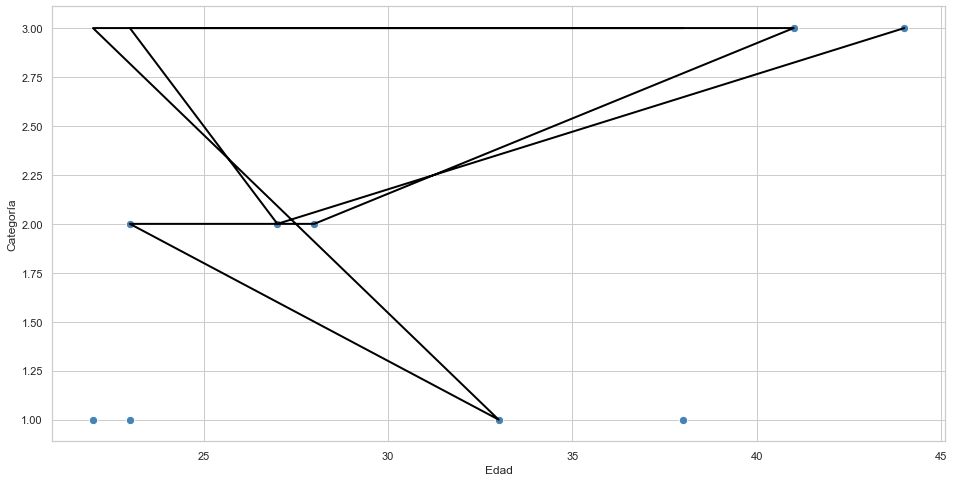

In [326]:
plt.figure(figsize=(16, 8))
plt.scatter(X_test['person_age'], y_test, c='steelblue',
            edgecolor='white', s=70)
plt.plot(X_test['person_age'], clf.predict(X_test),
         color='black', lw=2)
plt.xlabel('Edad')
plt.ylabel('Categoría')
plt.show()

## NEURAL NETWORK

In [327]:
from sklearn import neural_network
import matplotlib.pyplot as plt

In [328]:
clf = neural_network.MLPClassifier(
    solver='lbfgs', 
    alpha=1e-5, 
    hidden_layer_sizes=(5, 2), 
    random_state=1, 
    max_iter=5000
)

In [329]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [330]:
clf.predict(X_test)

array([3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [331]:
clf.score(X_test, y_test)

0.2222222222222222

La Red Neuronal tuvo el **peor** resultado de los modelos, prediciendo solo un tercio de los casos.

## Selección del modelo

Elegir el modelo que consideren que mejor aplica a nuestro problema. Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

Descripción de la Hipótesis ¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

Selección de Regularizador ¿Utilizarán algún regularizador?¿Cuál?

Selección de Función de Costo ¿Cuál será la función de costo utilizada?

Justificación de las Selecciones ¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

Utilizar el método Grid Search, o de búsqueda exahustiva, con cross-validation para profundizar en la búsqueda y selección de hiperparámetros (fine tuning). Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
Accuracy o exactitud
Reporte de clasificación
Confusion matrix o matriz de confusión (graficar como heatmap)
Curva ROC y área bajo la curva (AUC).
Es apropiado utilizar la métrica acuracy o exactitud como medida de performance de nuestro modelo, de acuerdo a los datos con los que contamos? Por qué?


**Hipótesis**: El problema es clasificar el seniority de las personas, medido a través de "person_category", en función de la cantidad de tecnologías conocidas principalemente. La hipótesis nula es que a mayor número de tecnologías conocidas, mayor será la seniority. Adicionalmente se puede contemplar los años de experiencia de trabajo de cada individuo, siendo un factor clave para determinar el nivel de seniority.

**Selección de Regulizador**: los regulizadores tienen sentido en los modelos lineales, para evitar el overfitting de los modelos que lleva a la pérdida de capacidad predictiva fuera de la muestra de entrenamiento. Dado que se opta por un random forest esto se puede atacar desde varios parámetros del modelo. Para empezar, se puede determinar la profundidad máxima que puede tener cada árbol envitando el overfit. También es posible determinar el número mínimo de muestras para poder generar un split, si por ejemplo ese número es 10, no se podrá generar un nuevo split si se llega a una hoja con menos de ese número de datos. Otra forma de verlo, es poniendo un mínimo al número de muestras remanentes que quedarán en cada hoja final. Todos estos parámetros pueden ser optimizado con el uso de GridSearch

**Selección de Función de Costo**: Para el caso de Random Forest las funciones de costo pueden ser GINI o ENTROPIA. El costo de GINI es una medida de cuán a menudo un elemento elegido aleatoriamente del conjunto sería etiquetado incorrectamente si fue etiquetado de manera aleatoria de acuerdo a la distribución de las etiquetas en el subconjunto. , mientras que el de entropía es una medida de ganancia de información. Ambos serán evaluados a través de la optimización con GridSearch.

**Justificación**: Seleccionamos este modelo porque trás correr las primeras pruebas, parece ser el que mejor uso hace de las dummies de tecnología para poder generar la clasificación.

In [332]:
rfc = RandomForestClassifier(random_state=0)

param_grid = { 
    'criterion':('gini', 'entropy'),
    'max_depth': (2, 3, 4),
    'min_samples_leaf':(1, 2, 3),
    'min_samples_split':(2, 3, 5)
    }

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)

CV_rfc.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'c

In [333]:
CV_rfc.best_score_

0.6976744186046512

In [334]:
CV_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [335]:
y_predicted = CV_rfc.best_estimator_.predict(X_test)

In [336]:
import sklearn.metrics as metrics

In [337]:
metrics.confusion_matrix(y_test, y_predicted)

array([[4, 0, 0],
       [0, 3, 0],
       [0, 0, 2]], dtype=int64)

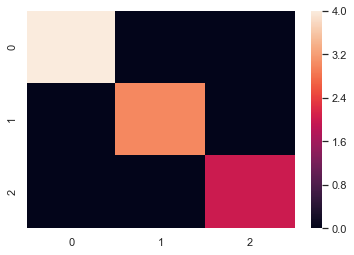

In [338]:
sns.heatmap(metrics.confusion_matrix(y_test, y_predicted))

In [339]:
'''
metrics.plot_roc_curve(CV_rfc.best_estimator_, X, y)
plt.show()     
'''

'\nmetrics.plot_roc_curve(CV_rfc.best_estimator_, X, y)\nplt.show()     \n'

Las curvas ROC no se pueden graficar en virtud de que estamos en un problema de clasificación multiclase. Para poder utilizar esta herramienta debe generarse un problema de clasificación binario del tipo 1 vs all.

Respecto a si es correcto utilizar Accuracy, Recall o una mezcla de ambas como métrica, nos inclinamos por Balanced Accuracy dado que queremos mejorar la precisión de las etiquetas pero dentro de un dataset desbalanceado.

In [340]:
metrics.balanced_accuracy_score(y_test, y_predicted)

1.0

La métrica llega a un valor óptimo.

## Aprendizaje No Supervisado

Nos concetraremos en intentar encontrar las tecnologías que determinan a un "Data Scientist", y luego intentaremos montar un sistema de recomendación de tecnologías para que los recursos humanos puedan formarse como científicos de datos.

In [341]:
skills = df.drop(columns=['person_category', 'person_age', 'person_experience'])

In [342]:
# Create correlation matrix
corr_matrix = skills.corr().abs()

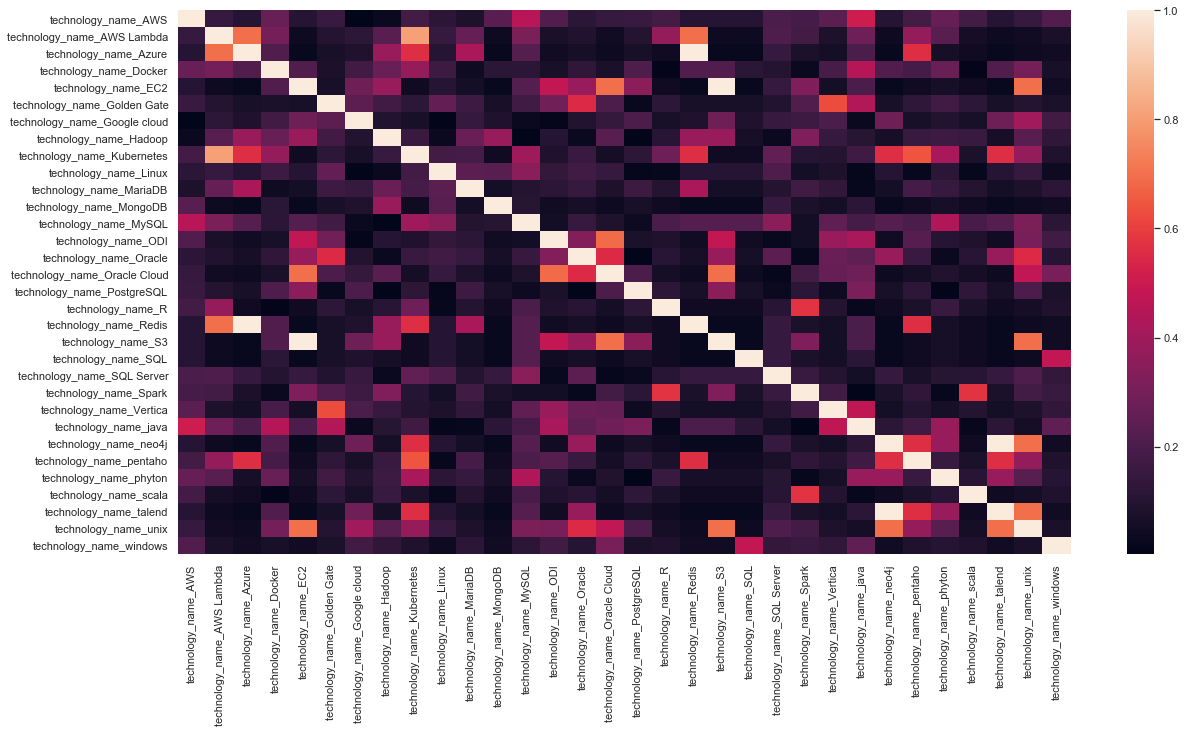

In [343]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr_matrix)

A priori, no se ven relaciones claras entre diferentes tecnologías.

¿Que skills tienen los Data Scientists?

In [344]:
data_scientists = dataset3[dataset3['skill_name']=='Data Scientist']
data_scientists.sample(3)

skill_id  \
person_id                                                                                               
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   

                                                        skill_name skill_type  \
person_id                                                                       
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...  Data Scientist      skill   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...  Data Scientist      skill   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...  Data Scientist      skill   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...  Data Scientist      skill   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...  Data Scientist      skill   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...  Data Scientist      skill   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...  Data Scientist      skill   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...  Data Scientist      skill   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...  Data Scientist      skill   

                                                   person_name person_type  \
person_id                                                                    
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...      Hugo S      person   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...    Hernan U      person   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...    Natali L      person   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...    Fernando      person   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...   Mariana T      person   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...      Martin      person   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...   Gustavo M      person   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...     Diego M      person   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...   Luciano M      person   

                                                    person_category  \
person_id                                                             
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                2   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                2   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                2   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                2   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                2   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                3   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                2   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                3   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                3   

                                                   person_gender  person_age  \
person_id                                                                      
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...          male        23.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...          male        22.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...        female        24.0   
5128

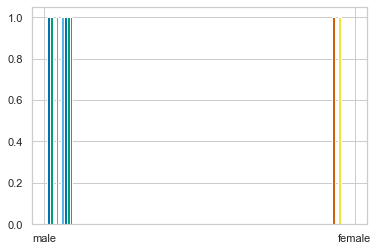

In [345]:
data_scientists['person_gender'].hist()

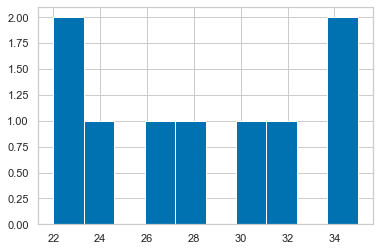

In [346]:
data_scientists['person_age'].hist()

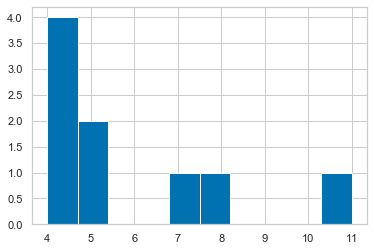

In [347]:
data_scientists['person_experience'].hist()

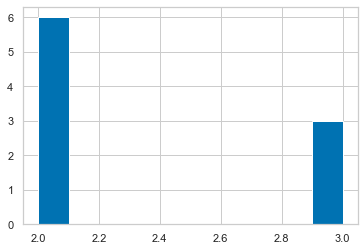

In [348]:
data_scientists['person_category'].hist()

Los Data Scientist son mayormente hombres, con experiencia entre semi-senior o senior. No hay Juniors DS.

In [349]:
means = dataset3.groupby('skill_name').mean()
means = means[['person_category','person_age','person_experience', 'technology_name_AWS', 'technology_name_AWS Lambda',
       'technology_name_Azure', 'technology_name_Docker',
       'technology_name_EC2', 'technology_name_Golden Gate',
       'technology_name_Google cloud', 'technology_name_Hadoop',
       'technology_name_Kubernetes', 'technology_name_Linux',
       'technology_name_MariaDB', 'technology_name_MongoDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Oracle', 'technology_name_Oracle Cloud',
       'technology_name_PostgreSQL', 'technology_name_R',
       'technology_name_Redis', 'technology_name_S3', 'technology_name_SQL',
       'technology_name_SQL Server', 'technology_name_Spark',
       'technology_name_Vertica', 'technology_name_java',
       'technology_name_neo4j', 'technology_name_pentaho',
       'technology_name_phyton', 'technology_name_scala',
       'technology_name_talend', 'technology_name_unix',
       'technology_name_windows']]
means

person_category  person_age  person_experience  \
skill_name                                                         
DBA                      2.111111   34.666667           5.555556   
Data Scientist           2.333333   28.333333           5.777778   
Developer                1.894737   30.684211           6.263158   
Technical Leader         2.833333   37.833333           7.833333   

                  technology_name_AWS  technology_name_AWS Lambda  \
skill_name                                                          
DBA                          0.222222                    0.000000   
Data Scientist               0.222222                    0.111111   
Developer                    0.368421                    0.052632   
Technical Leader             0.333333                    0.000000   

                  technology_name_Azure  technology_name_Docker  \
skill_name                                                        
DBA                            0.000000                0.333333   
Data Scientist                 0.000000                0.222222   
Developer                      0.052632                0.368421   
Technical Leader               0.000000                0.500000   

                  technology_name_EC2  technology_name_Golden Gate  \
skill_name                                                           
DBA                          0.000000                     0.777778   
Data Scientist               0.000000                     0.000000   
Developer                    0.000000                     0.000000   
Technical Leader             0.166667                     0.000000   

                  technology_name_Google cloud  ...  technology_name_Spark  \
skill_name                                      ...                          
DBA                                   0.000000  ...               0.000000   
Data Scientist                        0.222222  ...               0.777778   
Developer                             0.315789  ...               0.000000   
Technical Leader                      0.333333  ...               0.166667   

                  technology_name_Vertica  technology_name_java  \
skill_name                                                        
DBA                              0.444444              0.333333   
Data Scientist                   0.111111              0.666667   
Developer                        0.000000              0.684211   
Technical Leader                 0.000000              0.833333   

                  technology_name_neo4j  technology_name_pentaho  \
skill_name                                                         
DBA                            0.000000                 0.111111   
Data Scientist                 0.000000                 0.000000   
Developer                      0.000000                 0.052632   
Technical Leader               0.166667                 0.166667   

                  technology_name_phyton  technology_name_scala  \
skill_name                                                        
DBA                             0.000000               0.000000   
Data Scientist                  0.222222               0.333333   
Developer                       0.157895               0.000000   
Technical Leader                0.166667               0.000000   

                  technology_name_talend  technology_name_unix  \
skill_name                                                       
DBA                             0.000000              0.000000   
Data Scientist                  0.000000              0.000000   
Developer                       0.000000              0.000000   
Technical Leader                0.166667              0.333333   

                  technology_name_windows  
skill_name                                 
DBA                              0.222222  
Data Scientist                   0.000000  
Developer                        0.105263  
Technical Leader                 0.000000  

[4 rows x 35 columns]

## NEED SOME HELP WITH THE NEXT GRAPH:

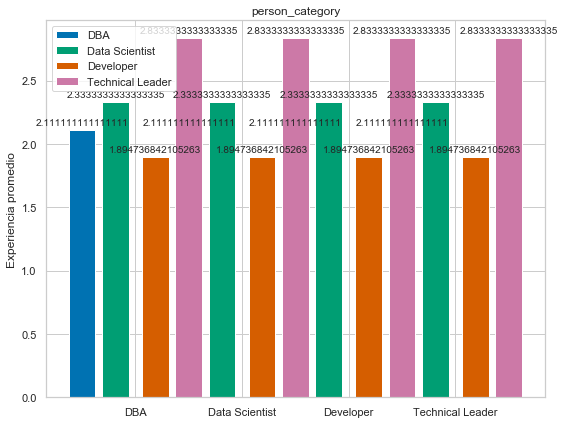

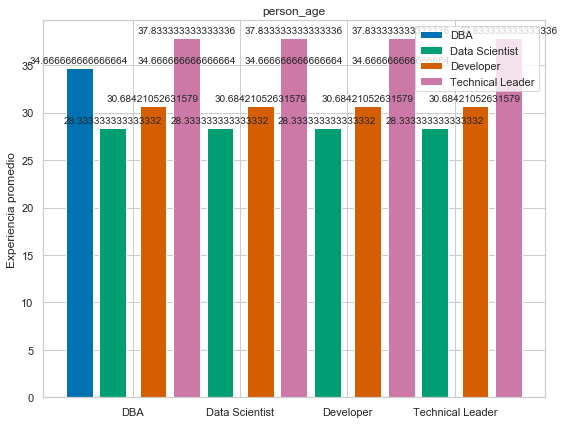

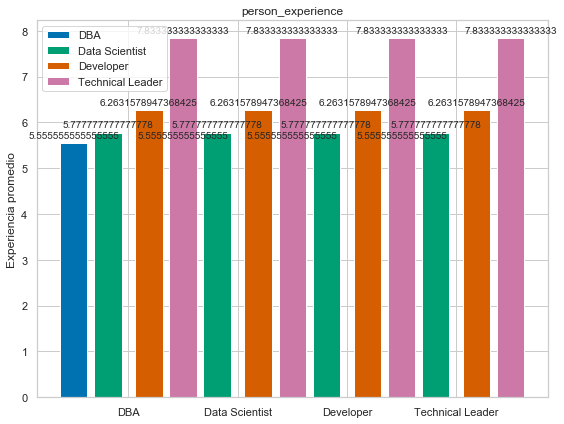

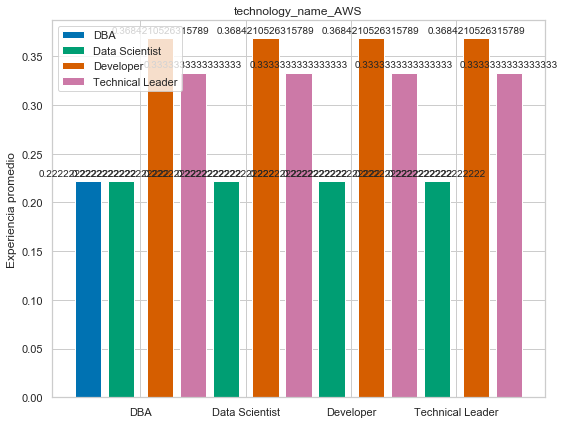

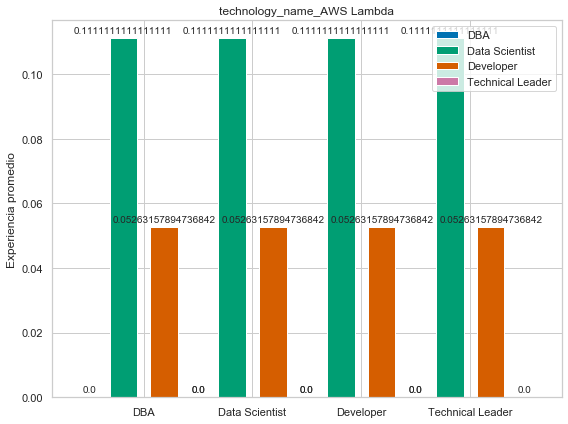

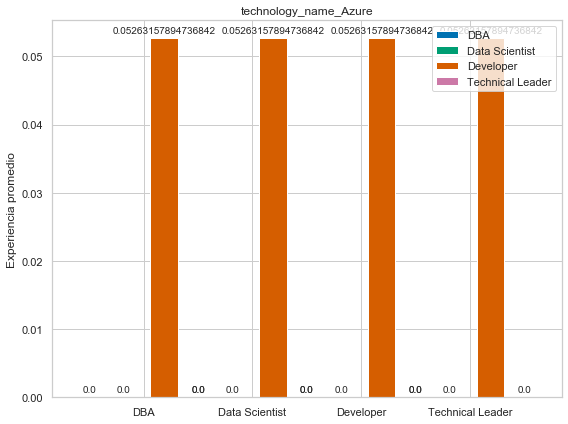

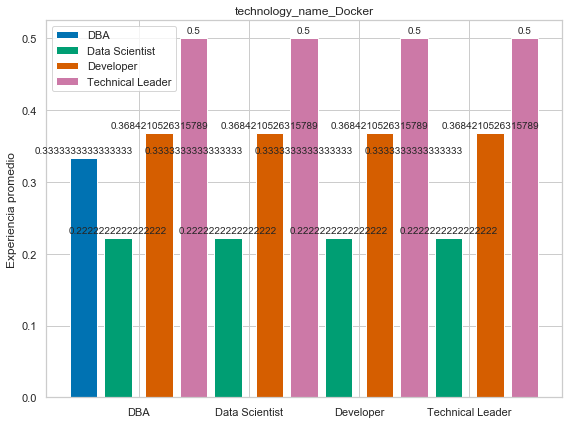

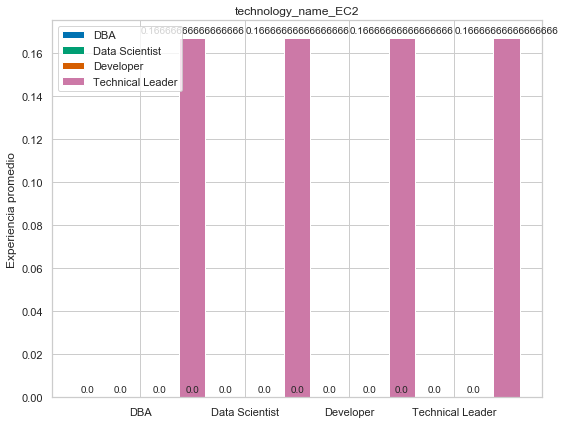

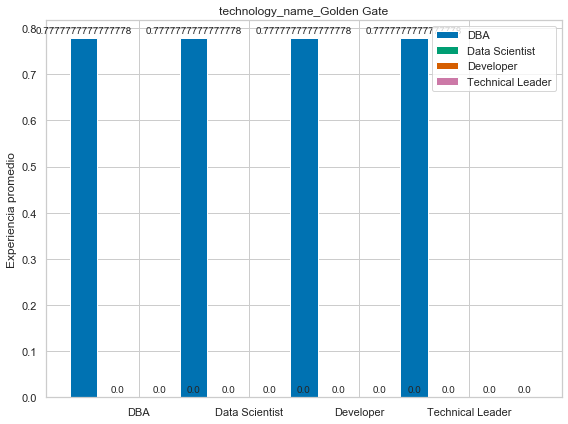

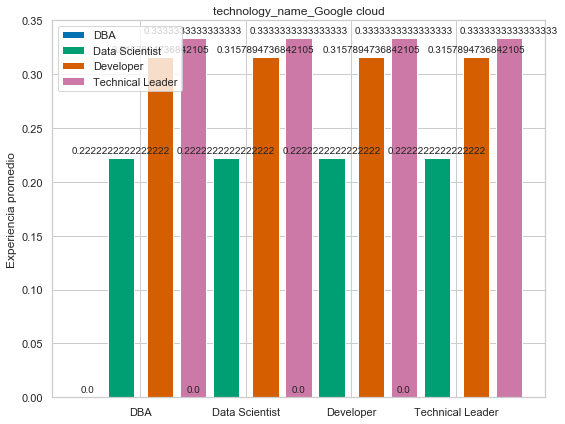

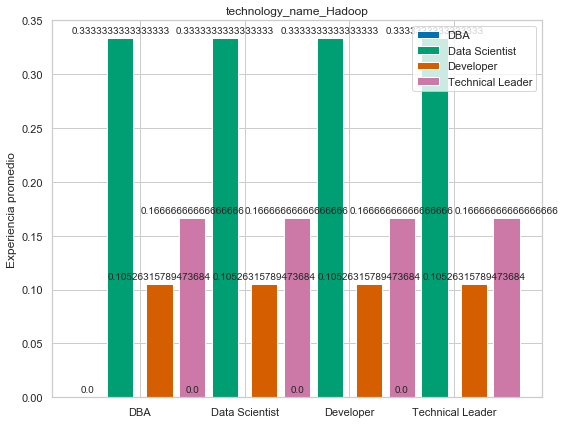

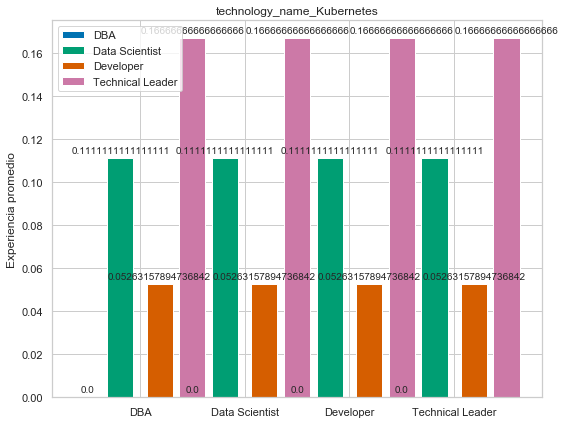

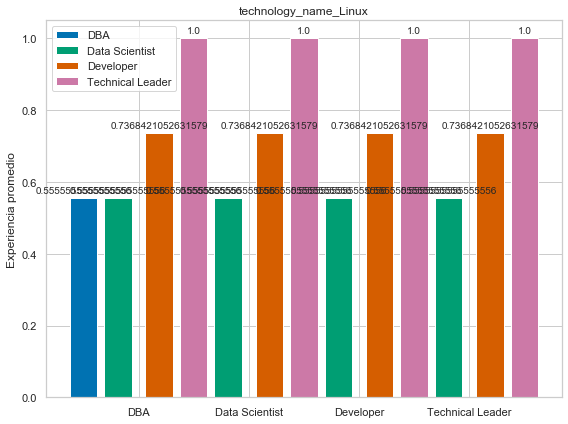

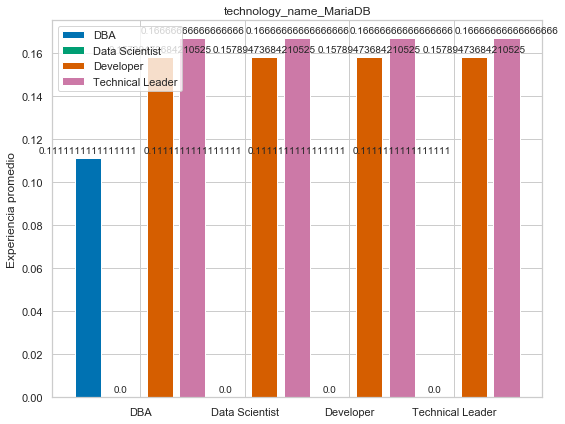

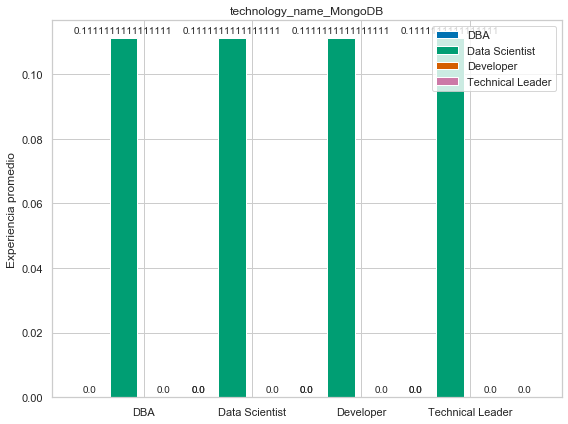

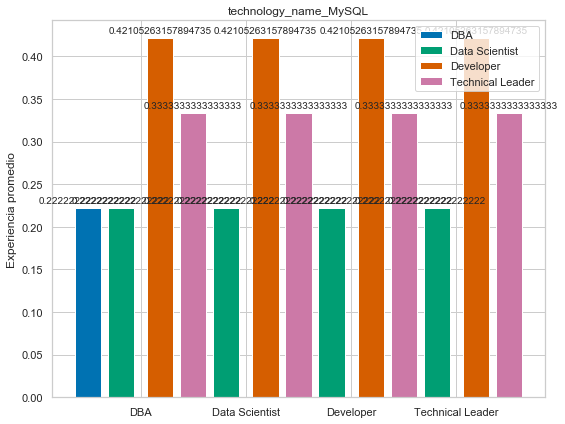

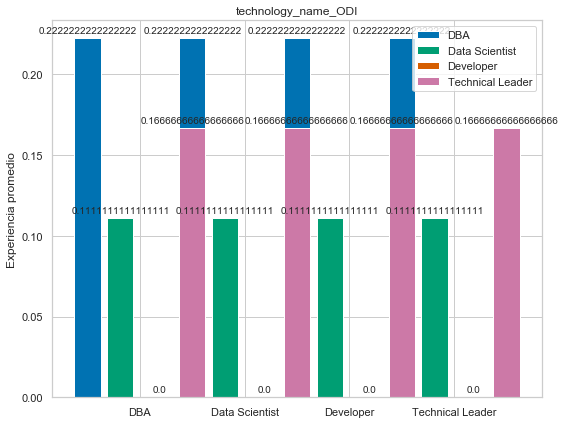

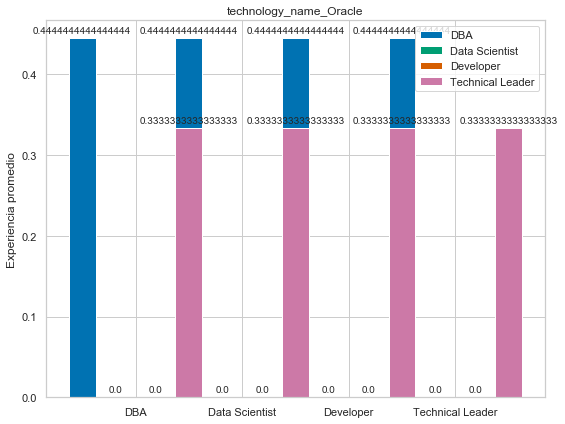

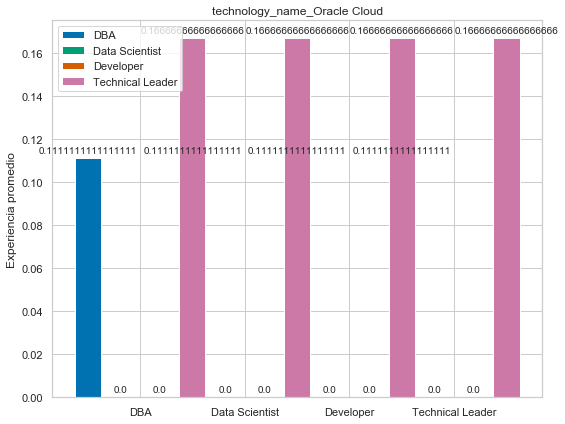

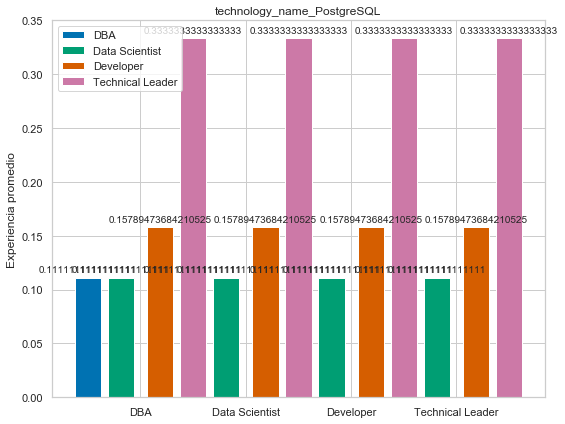

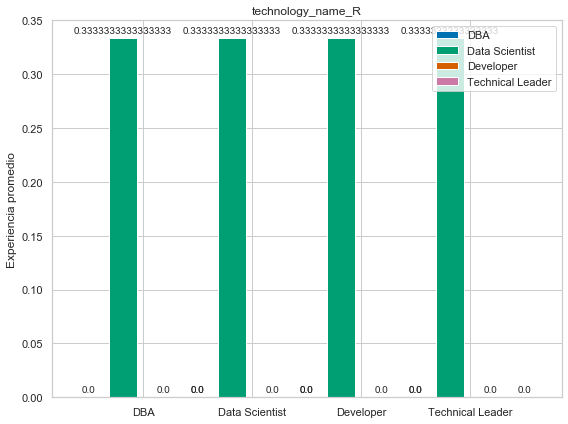

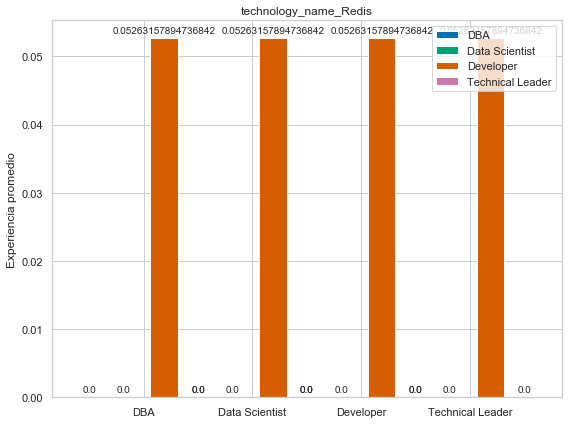

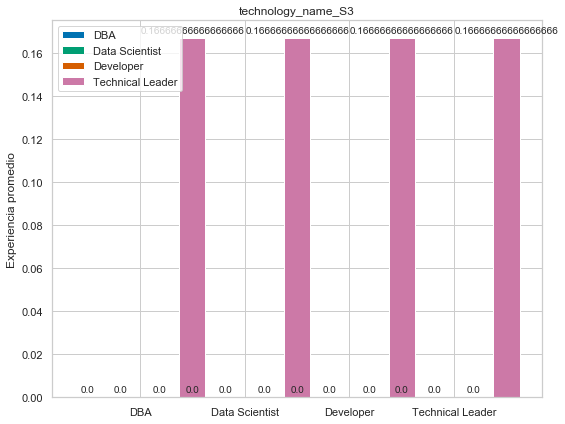

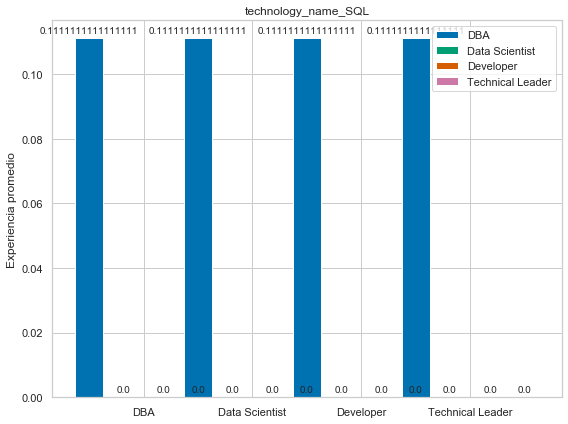

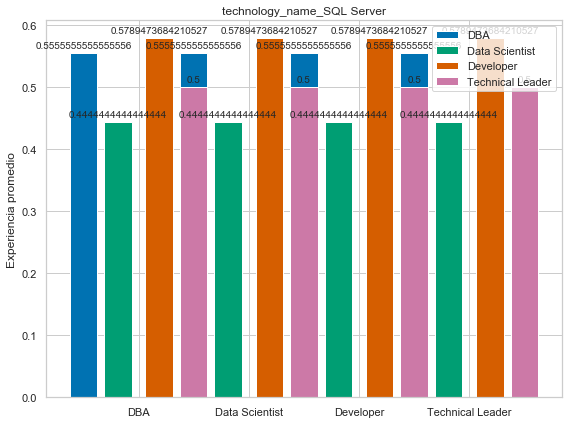

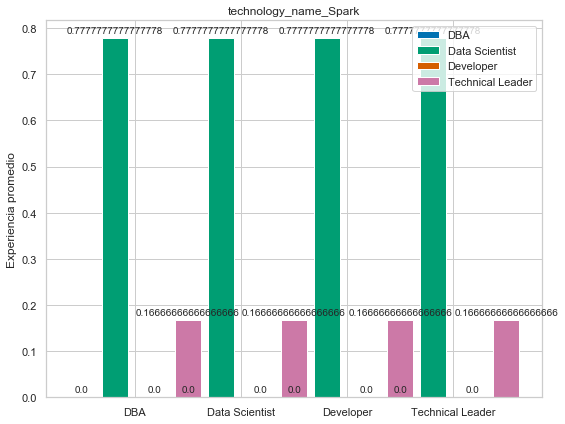

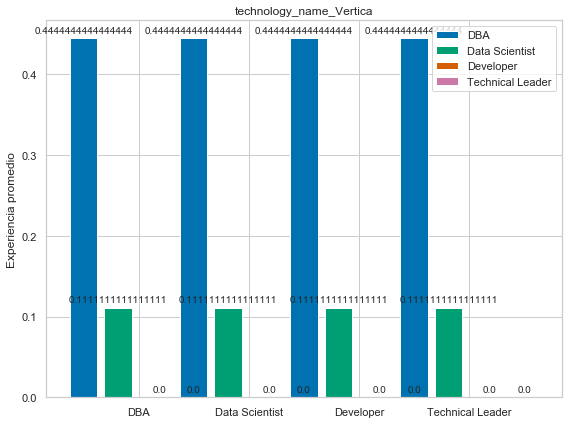

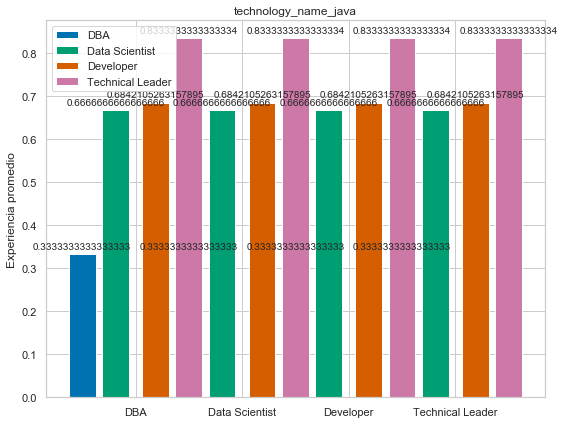

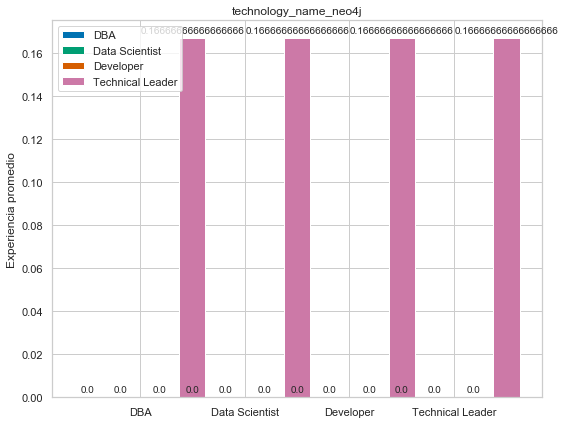

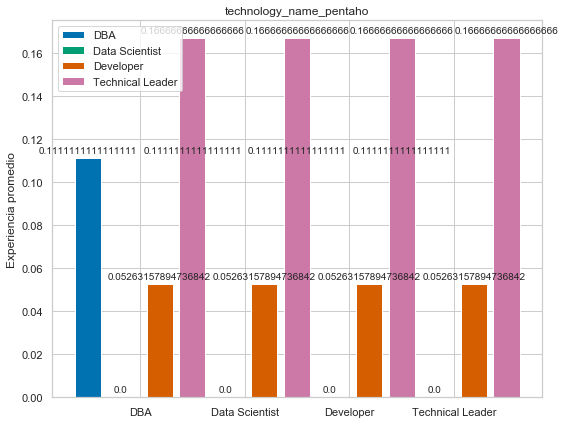

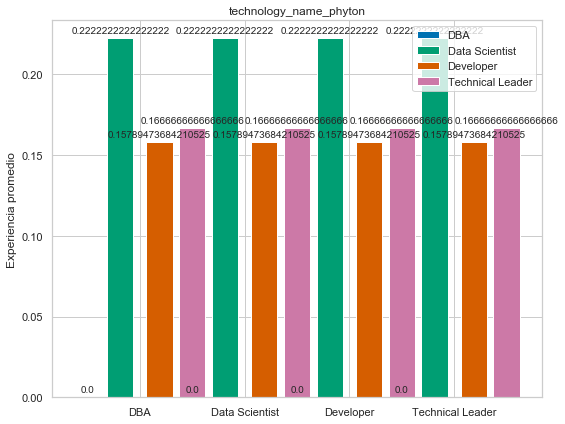

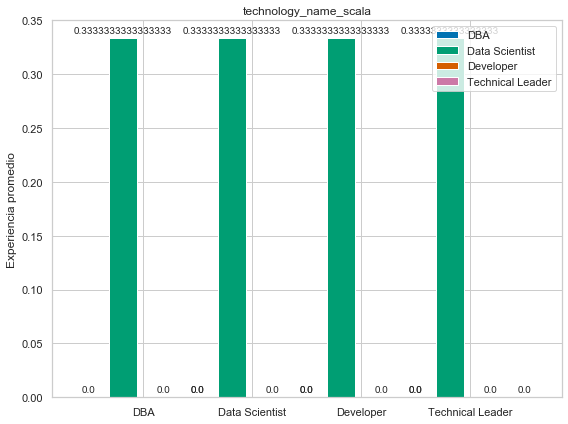

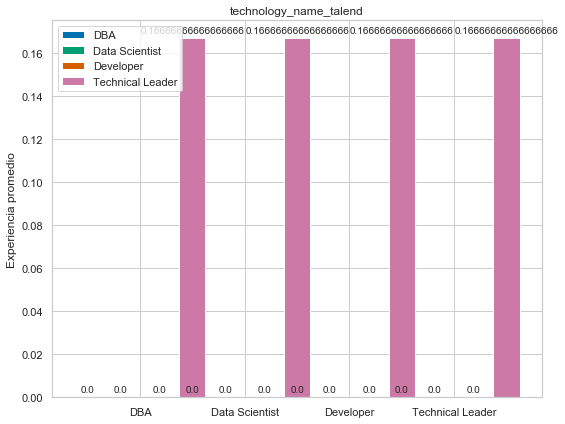

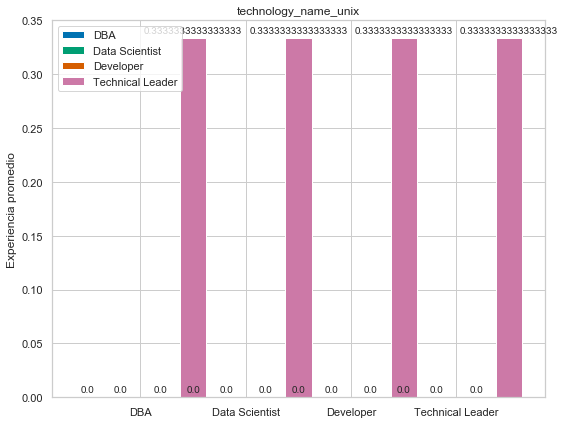

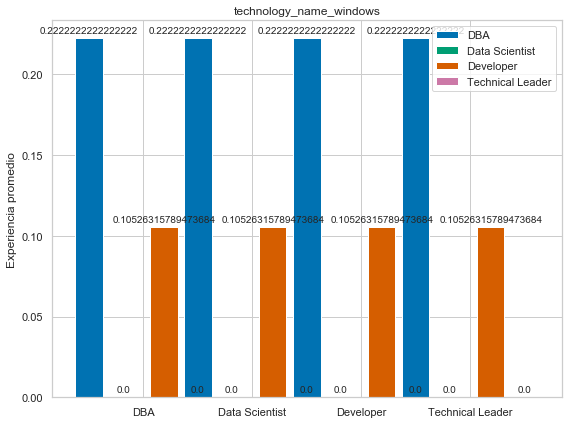

In [350]:
for c in means.columns:

    labels = list(means.index)
    dba_means = means[c].loc['DBA']
    ds_means = means[c].loc['Data Scientist']
    dev_means = means[c].loc['Developer']
    tl_mean = means[c].loc['Technical Leader']

    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(8,6))
    rects1 = ax.bar(x - 2 * width, dba_means, width, label='DBA')
    rects2 = ax.bar(x - 0.75 * width, ds_means, width, label='Data Scientist')
    rects3 = ax.bar(x + 0.75 *width, dev_means, width, label='Developer')
    rects4 = ax.bar(x + 2* width, tl_mean, width, label='Technical Leader')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Experiencia promedio')
    ax.set_title(c)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)

    fig.tight_layout()

    plt.show()

In [351]:
skills.columns

Index(['technology_name_AWS', 'technology_name_AWS Lambda',
       'technology_name_Azure', 'technology_name_Docker',
       'technology_name_EC2', 'technology_name_Golden Gate',
       'technology_name_Google cloud', 'technology_name_Hadoop',
       'technology_name_Kubernetes', 'technology_name_Linux',
       'technology_name_MariaDB', 'technology_name_MongoDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Oracle', 'technology_name_Oracle Cloud',
       'technology_name_PostgreSQL', 'technology_name_R',
       'technology_name_Redis', 'technology_name_S3', 'technology_name_SQL',
       'technology_name_SQL Server', 'technology_name_Spark',
       'technology_name_Vertica', 'technology_name_java',
       'technology_name_neo4j', 'technology_name_pentaho',
       'technology_name_phyton', 'technology_name_scala',
       'technology_name_talend', 'technology_name_unix',
       'technology_name_windows'],
      dtype='object')

In [352]:
techs = data_scientists[['technology_name_AWS', 'technology_name_AWS Lambda',
       'technology_name_Azure', 'technology_name_Docker',
       'technology_name_EC2', 'technology_name_Golden Gate',
       'technology_name_Google cloud', 'technology_name_Hadoop',
       'technology_name_Kubernetes', 'technology_name_Linux',
       'technology_name_MariaDB', 'technology_name_MongoDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Oracle', 'technology_name_Oracle Cloud',
       'technology_name_PostgreSQL', 'technology_name_R',
       'technology_name_Redis', 'technology_name_S3', 'technology_name_SQL',
       'technology_name_SQL Server', 'technology_name_Spark',
       'technology_name_Vertica', 'technology_name_java',
       'technology_name_neo4j', 'technology_name_pentaho',
       'technology_name_phyton', 'technology_name_scala',
       'technology_name_talend', 'technology_name_unix',
       'technology_name_windows']].sum()
techs

technology_name_AWS             2
technology_name_AWS Lambda      1
technology_name_Azure           0
technology_name_Docker          2
technology_name_EC2             0
technology_name_Golden Gate     0
technology_name_Google cloud    2
technology_name_Hadoop          3
technology_name_Kubernetes      1
technology_name_Linux           5
technology_name_MariaDB         0
technology_name_MongoDB         1
technology_name_MySQL           2
technology_name_ODI             1
technology_name_Oracle          0
technology_name_Oracle Cloud    0
technology_name_PostgreSQL      1
technology_name_R               3
technology_name_Redis           0
technology_name_S3              0
technology_name_SQL             0
technology_name_SQL Server      4
technology_name_Spark           7
technology_name_Vertica         1
technology_name_java            6
technology_name_neo4j           0
technology_name_pentaho         0
technology_name_phyton          2
technology_name_scala           3
technology_nam

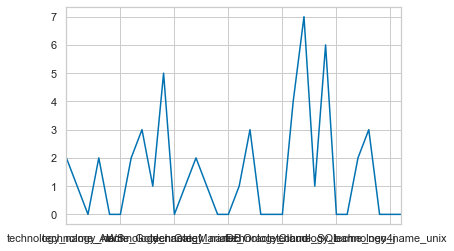

In [353]:
techs.plot()

In [354]:
'''
Sabemos que hay 4 potenciales clusters optimos, por los tipos de perfiles. Intentaremos agruparlos según las tecnologías que cada uno conoce.
'''

dataset3.skill_name.unique()

array(['Technical Leader', 'Data Scientist', 'DBA', 'Developer'],
      dtype=object)

In [355]:
# Buscamos los clusters para los jugadores

from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  98.50350877192983


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

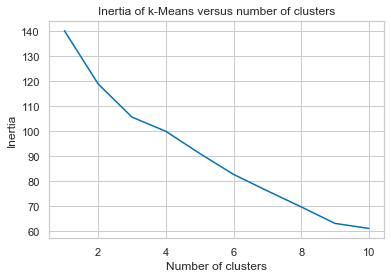

In [356]:
# Buscamos el hiperparámetro 'n_clusters', variando de 1 a 11 clusters

#Metemos la función scores dentro del grafico
scores = [KMeans(n_clusters=i+1).fit(skills).inertia_ for i in range(10)]
#+1 para que empiece del cluster 1 ya que range(10) va de 0 a 10

from matplotlib import pyplot as plt
plt.plot(np.arange(1, 11), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

# El conjunto de jugadores tendria 4 clusters

In [357]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
import plotly.express as px

In [358]:
#Graficamos los grupos generados por los clusters

skill_1='technology_name_java'
skill_2='technology_name_Spark'

kmean_clusters = go.Scatter(
    x=skills[skill_1], 
    y=skills[skill_2],
    mode='markers',
    text=dataset3['skill_name'],
    marker=dict(
        size=5,
        color = clusters.astype(np.float), #set color equal to a variable
        colorscale='Portland',
        showscale=False
        )
    )

data=[kmean_clusters]

layout = go.Layout(
    title="Clustering K means ",
    titlefont=dict(size=20),
    xaxis=dict(title=skill_1),
    yaxis=dict(title=skill_2),
    autosize=False, 
    width=600,height=600
)

fig = go.Figure(
    data=data,
    layout=layout
    )

plot(fig)

'temp-plot.html'

KMeans no arroja buenos resultados en el dataframe plano.

Ingeniería de Datos: intentaremos darle valor de experiencia a las tecnologías conocidas.

In [359]:
skills.sample(3)

technology_name_AWS  \
person_id                                                                 
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...                    0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                    0   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...                    0   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...                    0   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...                    0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                    1   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                    0   
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f...                    0   
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f...                    1   
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f...                    0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                    0   
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e7...                    0   
55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2f...                    0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                    0   
6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2f...                    1   
6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e7...                    0   
6f67cd4d1b4109e9d15073ee35bd49fb-c81e728d9d4c2f...                    1   
79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e7...                    0   
822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2f...                    0   
87f1d3a3fcdd5e8b39fe59e0f2bf0e35-c81e728d9d4c2f...                    0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                    0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                    0   
a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2f...                    0   
a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2f...                    0   
ac37b1f5d42e5d18336340a3f089d8b2-c81e728d9d4c2f...                    0   
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f...                    1   
bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2f...                    0   
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f...                    0   
c720cbe09318399805229024f20a1822-c81e728d9d4c2f...                    1   
d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2f...                    1   
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f...                    1   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                    0   
e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2f...                    0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                    1   
eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2f...                    1   
f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2f...                    0   
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f...                    0   
f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2f...                    0   
f5b3b175e984e125c98e21c71dcddd71-c81e728d9d4c2f...                    1   
f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e7...                    0   
f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2f...                    1   
f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2f...                    1   
f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2f...                    0   

                                                    technology_name_AWS Lambda  \
person_id                                                                        
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...                           0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                           0   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...                           0   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...                           0   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...                           0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                           0   
3c6052e0f7e58eca265f

In [360]:
exp = np.asarray(df['person_experience'])
len(exp)

43

In [361]:
skills2 = skills.multiply(exp, axis='rows', level=None, fill_value=None)
skills2.sample(3)

technology_name_AWS  \
person_id                                                                 
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...                  0.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                  0.0   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...                  0.0   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...                  0.0   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...                  0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                  7.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                  0.0   
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f...                  0.0   
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f...                  2.0   
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f...                  0.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                  0.0   
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e7...                  0.0   
55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2f...                  0.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                  0.0   
6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2f...                  7.0   
6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e7...                  0.0   
6f67cd4d1b4109e9d15073ee35bd49fb-c81e728d9d4c2f...                  8.0   
79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e7...                  0.0   
822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2f...                  0.0   
87f1d3a3fcdd5e8b39fe59e0f2bf0e35-c81e728d9d4c2f...                  0.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                  0.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                  0.0   
a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2f...                  0.0   
a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2f...                  0.0   
ac37b1f5d42e5d18336340a3f089d8b2-c81e728d9d4c2f...                  0.0   
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f...                  8.0   
bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2f...                  0.0   
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f...                  0.0   
c720cbe09318399805229024f20a1822-c81e728d9d4c2f...                  8.0   
d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2f...                  3.0   
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f...                  4.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                  0.0   
e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2f...                  0.0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                  8.0   
eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2f...                  8.0   
f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2f...                  0.0   
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f...                  0.0   
f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2f...                  0.0   
f5b3b175e984e125c98e21c71dcddd71-c81e728d9d4c2f...                  4.0   
f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e7...                  0.0   
f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2f...                 27.0   
f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2f...                 10.0   
f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2f...                  0.0   

                                                    technology_name_AWS Lambda  \
person_id                                                                        
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...                         0.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                         0.0   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...                         0.0   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...                         0.0   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...                         0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                         0.0   
3c6052e0f7e58eca265f

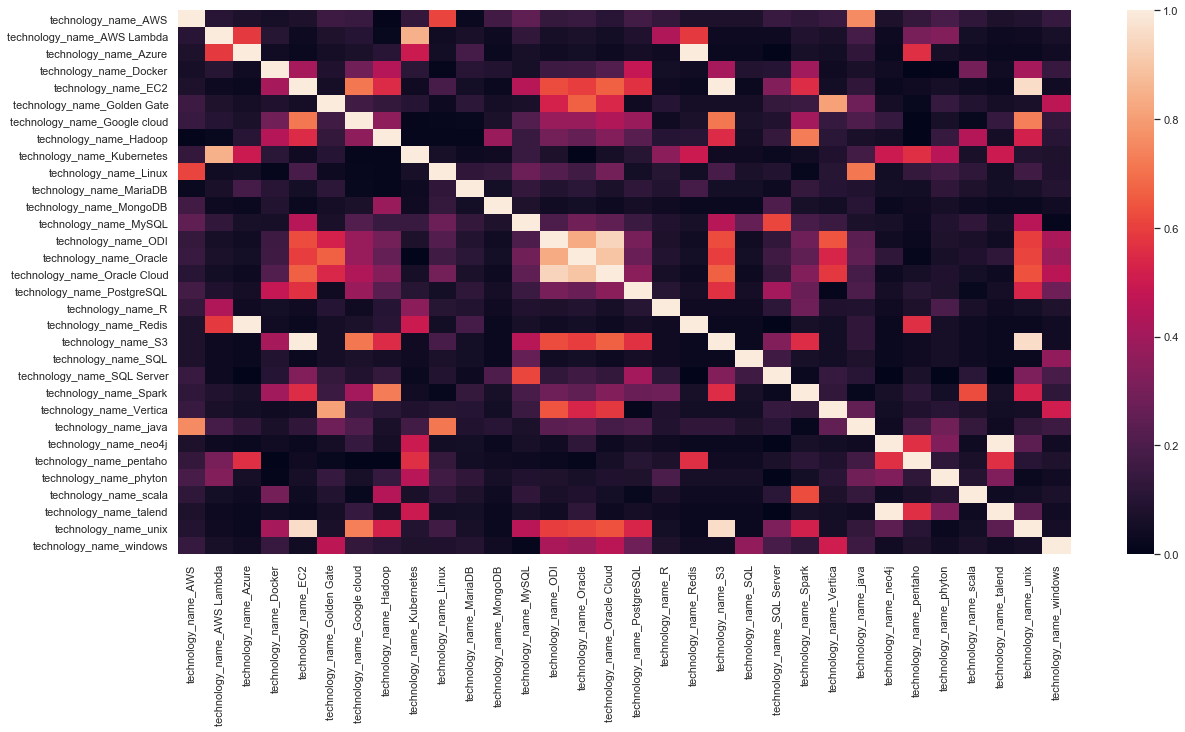

In [362]:
# Create correlation matrix
corr_matrix = skills2.corr().abs()
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr_matrix)

Esta visión nos permite ver mejores agrupaciones, pero no radicalmente mejores. Permite mejorar el KMeans, pero aun los resulados no son los mejores.

In [363]:
skills2.sum()

technology_name_AWS             104.0
technology_name_AWS Lambda        7.0
technology_name_Azure             3.0
technology_name_Docker           86.0
technology_name_EC2              11.0
technology_name_Golden Gate      35.0
technology_name_Google cloud     43.0
technology_name_Hadoop           44.0
technology_name_Kubernetes       10.0
technology_name_Linux           199.0
technology_name_MariaDB          28.0
technology_name_MongoDB           8.0
technology_name_MySQL            70.0
technology_name_ODI              31.0
technology_name_Oracle           38.0
technology_name_Oracle Cloud     23.0
technology_name_PostgreSQL       44.0
technology_name_R                12.0
technology_name_Redis             3.0
technology_name_S3               11.0
technology_name_SQL               7.0
technology_name_SQL Server      128.0
technology_name_Spark            50.0
technology_name_Vertica          28.0
technology_name_java            186.0
technology_name_neo4j             3.0
technology_n

Aquí podemos ver las skills más importantes para los data scientist pesadas por experiencia.

In [364]:

exp = np.asarray(data_scientists['person_experience'])
len(exp)
skills_ds = data_scientists.iloc[:,43:].multiply(exp, axis='rows', level=None, fill_value=None)
skills_ds.sample(3)

technology_name_AWS  \
person_id                                                                 
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                  0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                  7.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                  0.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                  0.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                  0.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                  0.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                  0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                  0.0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                  8.0   

                                                    technology_name_AWS Lambda  \
person_id                                                                        
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                         0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                         0.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                         0.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                         4.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                         0.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                         0.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                         0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                         0.0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                         0.0   

                                                    technology_name_Azure  \
person_id                                                                   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                    0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                    0.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                    0.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                    0.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                    0.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                    0.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                    0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                    0.0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                    0.0   

                                                    technology_name_Docker  \
person_id                                                                    
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                     0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                     0.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                     0.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                     4.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                     0.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                     0.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                     0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                    11.0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                     0.0   

                                                    technology_name_EC2  \
person_id                                                                 
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                  0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                  0.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                  0.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                  0.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                  0.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                  0.0   
9ea9cb2299b79282

In [365]:
clue = skills_ds.sum()
clue.sample(3)

technology_name_AWS             15.0
technology_name_AWS Lambda       4.0
technology_name_Azure            0.0
technology_name_Docker          15.0
technology_name_EC2              0.0
technology_name_Golden Gate      0.0
technology_name_Google cloud     8.0
technology_name_Hadoop          26.0
technology_name_Kubernetes       4.0
technology_name_Linux           24.0
technology_name_MariaDB          0.0
technology_name_MongoDB          8.0
technology_name_MySQL            8.0
technology_name_ODI              5.0
technology_name_Oracle           0.0
technology_name_Oracle Cloud     0.0
technology_name_PostgreSQL       4.0
technology_name_R               12.0
technology_name_Redis            0.0
technology_name_S3               0.0
technology_name_SQL              0.0
technology_name_SQL Server      22.0
technology_name_Spark           39.0
technology_name_Vertica          5.0
technology_name_java            39.0
technology_name_neo4j            0.0
technology_name_pentaho          0.0
t

A partir de acá conocemos las tecnologías conocidas por los data scientists pesadas por experiencia.

Probamos con ideas de https://github.com/eflegara/NetStruc

In [366]:
try:
    ## For Network Analysis and Visualization
    import networkx as nx
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    from collections import defaultdict
    import operator

    ## For Hierarchical Clustering
    from scipy.cluster import hierarchy
    from scipy.spatial import distance
    
    ## For Community Detection (Louvain Method)
    #import community
    import unicodecsv as csv
    
except:
    import traceback
    traceback.print_exc()
    raise ImportError('Something failed, see above.')

In [367]:
dataset3.columns

Index(['skill_id', 'skill_name', 'skill_type', 'person_name', 'person_type',
       'person_category', 'person_gender', 'person_age', 'person_experience',
       'technology_id', 'technology_type', 'Docker', 'Hadoop', 'java', 'scala',
       'Spark', 'AWS Lambda', 'phyton', 'Kubernetes', 'Linux', 'MySQL',
       'SQL Server', 'R', 'Google cloud', 'PostgreSQL', 'AWS', 'MongoDB',
       'Vertica', 'ODI', 'Golden Gate', 'Oracle', 'pentaho', 'windows', 'SQL',
       'MariaDB', 'Oracle Cloud', 'Redis', 'Azure', 'unix', 'S3', 'EC2',
       'talend', 'neo4j', 'technology_name_AWS', 'technology_name_AWS Lambda',
       'technology_name_Azure', 'technology_name_Docker',
       'technology_name_EC2', 'technology_name_Golden Gate',
       'technology_name_Google cloud', 'technology_name_Hadoop',
       'technology_name_Kubernetes', 'technology_name_Linux',
       'technology_name_MariaDB', 'technology_name_MongoDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Or

In [464]:
pd.set_option('display.max_columns', None)

for_g = dataset3.drop(columns=["Docker", "Hadoop", "java", "scala", "Spark", "AWS Lambda", "phyton", "Kubernetes", "Linux", "MySQL", "SQL Server", "R", "Google cloud", "PostgreSQL", "AWS","MongoDB","Vertica","ODI","Golden Gate","Oracle","pentaho","windows","SQL","MariaDB","Oracle Cloud","Redis","Azure","unix","S3", "EC2","talend",	"neo4j","skill_id", "skill_type", "person_name", "person_type", "person_category", "person_gender", "person_age", "person_experience", "technology_id", "technology_type"])
for_g.reset_index(drop=True, inplace=True)
for_g = for_g.set_index(["skill_name"]).stack().rename('Status').reset_index().query('Status != 0')
#for_g = for_g[for_g["skill_name"]=="Data Scientist"]
display(for_g.sample(5))

skill_name                      level_1  Status
575              DBA      technology_name_windows       1
1159       Developer       technology_name_Hadoop       1
1253             DBA  technology_name_Golden Gate       1
1063  Data Scientist       technology_name_Hadoop       1
1304       Developer         technology_name_java       1

<class 'networkx.classes.graph.Graph'>


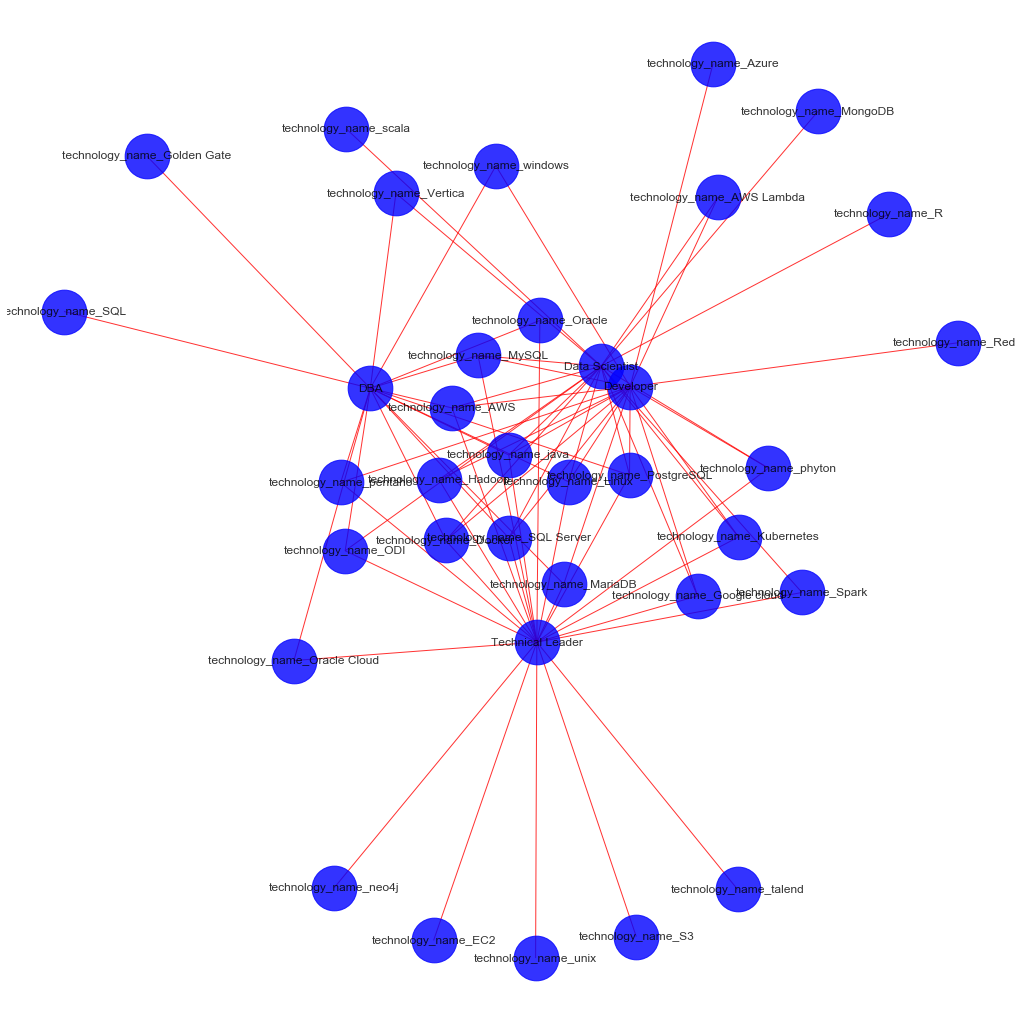

<Figure size 432x288 with 0 Axes>

In [468]:
#Librerias 
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.style as style 

#Estilo del gráfico
sns.set_context("notebook")
style.use("seaborn-colorblind")

#Gráfico
G = nx.from_pandas_edgelist(for_g,'level_1','skill_name')

print(type(G))
# larger figure size
plt.figure(3,figsize=(14,14)) 
#nx.draw(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)
#nx.draw_random(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)
#nx.draw_circular(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8) 
#nx.draw_spectral(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)
nx.draw_spring(G, with_labels=True, node_color='b', node_size=2000, alpha=0.8, edge_color="r")
plt.show()
plt.savefig("skills_grafo.jpg")

## Arrancar con sistema de recomendacion.

Partiendo de los skills obtenidos por los Data Scientists:

In [431]:
data_scientists.sample(3)

skill_id  \
person_id                                                                                               
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   

                                                        skill_name skill_type  \
person_id                                                                       
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...  Data Scientist      skill   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...  Data Scientist      skill   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...  Data Scientist      skill   

                                                   person_name person_type  \
person_id                                                                    
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...      Martin      person   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...   Gustavo M      person   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...    Natali L      person   

                                                    person_category  \
person_id                                                             
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                3   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                2   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                2   

                                                   person_gender  person_age  \
person_id                                                                      
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...          male        34.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...          male        31.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...        female        24.0   

                                                    person_experience  \
person_id                                                               
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                5.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                4.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                4.0   

                                                                                        technology_id  \
person_id                                                                                               
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...  de1284aa9ed99ad37c8259c2028b161c-a87ff679a2f3e...   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...  f61ef2e9dee2b13b9d5bc95d26cd2ce4-a87ff679a2f3e...   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...  a58efbe1a239da9280f6c0fe19958655-a87ff679a2f3e...   

                                                   technology_type  Docker  \
person_id                                                                    
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...    technologies     NaN   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...    technologies     NaN   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...    technologies     NaN   

                                                    Hadoop  java  scala  \
person_id                                                                 
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...     NaN   NaN    NaN   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...     NaN   NaN    NaN   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...     NaN   NaN    NaN   

                                                    Spark  AWS Lambda  phyton  \
person_id                                                                       
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...    NaN         NaN     NaN   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...    NaN         NaN     NaN   
3c6052e0f7e58eca265f85a3f6b929

In [432]:
clue.sample(3)

technology_name_Oracle    0.0
technology_name_talend    0.0
technology_name_S3        0.0
dtype: float64

In [433]:
skills_ds.sample(3)

technology_name_AWS  \
person_id                                                                 
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                  0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                  0.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                  0.0   

                                                    technology_name_AWS Lambda  \
person_id                                                                        
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                         0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                         0.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                         0.0   

                                                    technology_name_Azure  \
person_id                                                                   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                    0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                    0.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                    0.0   

                                                    technology_name_Docker  \
person_id                                                                    
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                     0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                    11.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                     0.0   

                                                    technology_name_EC2  \
person_id                                                                 
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                  0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                  0.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                  0.0   

                                                    technology_name_Golden Gate  \
person_id                                                                         
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                          0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                          0.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                          0.0   

                                                    technology_name_Google cloud  \
person_id                                                                          
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                           4.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                           0.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                           0.0   

                                                    technology_name_Hadoop  \
person_id                                                                    
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                     0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                    11.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                     0.0   

                                                    technology_name_Kubernetes  \
person_id                                                                        
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                         0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                         0.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                         0.0   

                                                    technology_name_Linux  \
person_id                                                                   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                    0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                    0.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                    5.0   

                                                    technology_name_MariaDB  \
person_i

In [372]:
base = skills_ds.pivot_table(columns=skills_ds.index)
base.head()

person_id                   044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       7.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   51280652ee54bf9e25636110b859faf5-a87ff679a2f3e71d9181a67b7542122c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                4.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    4.0                   
technology_name_EC2                                                       0.0                   

person_id                   57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e71d9181a67b7542122c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_E

In [434]:
base['count'] = base[base !=0 ].count(axis=1, level=None, numeric_only=True)

In [435]:
base['average'] = base.mean(axis=1)

In [436]:
C = base['average'].mean()

In [437]:
m = base['count'].quantile(0.70)

In [438]:
V = base['count']
R = base['average']
C 
m 

base['weighted_average'] = (V/(V+m) * R) + (m/(m+V) * C)

In [439]:
skills_ranked = base.sort_values('weighted_average', ascending=False)

**Recommender Mk1**

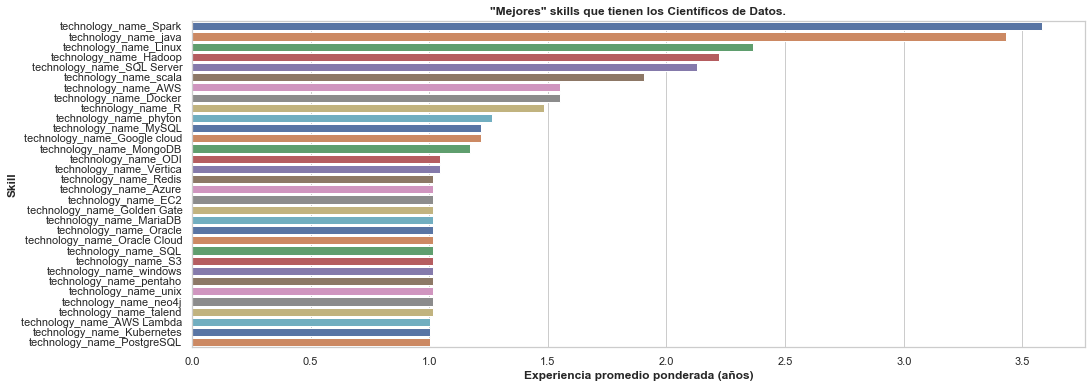

In [440]:
import matplotlib.pyplot as plt
import seaborn as sns

wavg = skills_ranked.sort_values('weighted_average', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=wavg['weighted_average'], y=wavg.index, data=wavg, palette='deep')

plt.xlim()
plt.title('"Mejores" skills que tienen los Científicos de Datos.', weight='bold')
plt.xlabel('Experiencia promedio ponderada (años)', weight='bold')
plt.ylabel('Skill', weight='bold')

plt.savefig('skills.png')

Esto nos permite tener un recomendador "genérico", sin conocer las skills del RRHH.

**Recommender Mk2**
We can use the popularity feature of our data to recommend movies based on popularity instead:

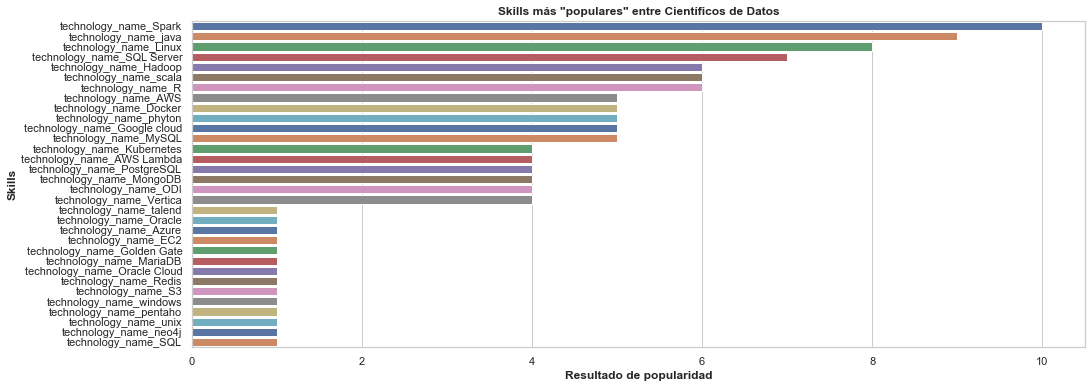

In [441]:
popular = skills_ranked.sort_values('count', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=popular['count'], y=popular.index, data=popular, palette='deep')

plt.title('Skills más "populares" entre Científicos de Datos', weight='bold')
plt.xlabel('Resultado de popularidad', weight='bold')
plt.ylabel('Skills', weight='bold')

plt.savefig('popular_skills.png')

**Recommender Mk3**
Combinación lineal de Mk1 y Mk2:

In [442]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
skills_scaled = min_max_scaler.fit_transform(base[['weighted_average', 'count']])
skills_norm = pd.DataFrame(skills_scaled, columns=['weighted_average', 'count'])
skills_norm.head()

weighted_average     count
0          0.212773  0.444444
1          0.000000  0.333333
2          0.004431  0.000000
3          0.212773  0.444444
4          0.004431  0.000000

In [443]:
a=skills_norm['weighted_average']
a.sample(3)

0     0.212773
1     0.000000
2     0.004431
3     0.212773
4     0.004431
5     0.004431
6     0.082774
7     0.472221
8     0.000000
9     0.528108
10    0.004431
11    0.065075
12    0.082774
13    0.016269
14    0.004431
15    0.004431
16    0.000000
17    0.186119
18    0.004431
19    0.004431
20    0.004431
21    0.436600
22    1.000000
23    0.016269
24    0.940313
25    0.004431
26    0.004431
27    0.101345
28    0.349606
29    0.004431
30    0.004431
31    0.004431
Name: weighted_average, dtype: float64

## **Calculating Similarity Scores**
Crearemos un recomendador basado en skills, en primer lugar, luego intentaremos restringirlo para convertir a los recursos en Data Scientists.

In [447]:
base2 = skills2.pivot_table(columns=skills2.index)
base2.head()

person_id                   02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    5.0                   
technology_name_EC2                                                       0.0                   

person_id                   10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       7.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_E

In [448]:
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics import pairwise_distances


''' 
El ejemplo usa sigmoid kernel, se puede experimentar con otro tipo de distancias que sean más apropiadas. En particular lo sustituí por distancia euclidea.

'''
# Compute the distances
dis = pd.DataFrame(pairwise_distances(base2, base2), columns= base2.index, index=base2.index)
rev_distances = dis ** -1
rev_distances[rev_distances >1 ] =1
rev_distances.sample(3)

technology_name_AWS  technology_name_AWS Lambda  \
technology_name_AWS                      1.000000                    0.027555   
technology_name_AWS Lambda               0.027555                    1.000000   
technology_name_Azure                    0.027724                    0.250000   
technology_name_Docker                   0.024830                    0.039746   
technology_name_EC2                      0.026603                    0.082761   
technology_name_Golden Gate              0.025692                    0.061314   
technology_name_Google cloud             0.026144                    0.061085   
technology_name_Hadoop                   0.026298                    0.050833   
technology_name_Kubernetes               0.027462                    0.333333   
technology_name_Linux                    0.030585                    0.022076   
technology_name_MariaDB                  0.027545                    0.071982   
technology_name_MongoDB                  0.028537                    0.106000   
technology_name_MySQL                    0.023250                    0.043315   
technology_name_ODI                      0.025071                    0.055556   
technology_name_Oracle                   0.024984                    0.053225   
technology_name_Oracle Cloud             0.025343                    0.058722   
technology_name_PostgreSQL               0.024663                    0.050965   
technology_name_R                        0.027318                    0.156174   
technology_name_Redis                    0.027724                    0.250000   
technology_name_S3                       0.026603                    0.082761   
technology_name_SQL                      0.027308                    0.116248   
technology_name_SQL Server               0.022917                    0.032158   
technology_name_Spark                    0.025206                    0.051778   
technology_name_Vertica                  0.025786                    0.064957   
technology_name_java                     0.038069                    0.022322   
technology_name_neo4j                    0.027724                    0.171499   
technology_name_pentaho                  0.027535                    0.171499   
technology_name_phyton                   0.027077                    0.124035   
technology_name_scala                    0.026225                    0.073127   
technology_name_talend                   0.027724                    0.171499   
technology_name_unix                     0.026519                    0.080322   
technology_name_windows                  0.024884                    0.053606   

                              technology_name_Azure  technology_name_Docker  \
technology_name_AWS                        0.027724                0.024830   
technology_name_AWS Lambda                 0.250000                0.039746   
technology_name_Azure                      1.000000                0.039253   
technology_name_Docker                     0.039253                1.000000   
technology_name_EC2                        0.087706                0.043153   
technology_name_Golden Gate                0.063246                0.035072   
technology_name_Google cloud               0.062994                0.042601   
technology_name_Hadoop                     0.051917                0.044544   
technology_name_Kubernetes                 0.200000                0.040032   
technology_name_Linux                      0.021990                0.022816   
technology_name_MariaDB                    0.075165                0.035489   
technology_name_MongoDB                    0.117041                0.037216   
technology_name_MySQL                      0.042679                0.033710   
technology_name_ODI                        0.056980                0.037398   
technology_name_Oracle                     0.054473                0.037582   
technology_name_Oracle Cloud               0.060412                0.038320   
technology_na

In [458]:
def give_rec(skill, rev_distances=rev_distances):
    
    # Get the pairwsie similarity scores 
    dis_scores = pd.DataFrame(rev_distances[skill])

    # Sort the skills 
    dis_scores.sort_values(by=skill, axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')

    # Scores of the 5 most similar skills
    dis_scores = dis_scores[1:6]

    # Top 5 most similar skills
    return list(dis_scores.index)

In [459]:
# Testing our content-based recommendation system
give_rec('technology_name_Spark')

['technology_name_Hadoop',
 'technology_name_scala',
 'technology_name_S3',
 'technology_name_EC2',
 'technology_name_unix']

In [452]:
#Traemos las skills que solo poseen los data scientits, y las usaremos para filtrar las recomendaciones
ds_skills = clue[clue != 0]
ds_skills

technology_name_AWS             15.0
technology_name_AWS Lambda       4.0
technology_name_Docker          15.0
technology_name_Google cloud     8.0
technology_name_Hadoop          26.0
technology_name_Kubernetes       4.0
technology_name_Linux           24.0
technology_name_MongoDB          8.0
technology_name_MySQL            8.0
technology_name_ODI              5.0
technology_name_PostgreSQL       4.0
technology_name_R               12.0
technology_name_SQL Server      22.0
technology_name_Spark           39.0
technology_name_Vertica          5.0
technology_name_java            39.0
technology_name_phyton           9.0
technology_name_scala           20.0
dtype: float64

In [455]:
def give_rec_ds(skill, rev_distances=rev_distances):
    
    # Get the pairwsie similarity scores 
    dis_scores = pd.DataFrame(rev_distances[skill])

    # Sort the skills 
    dis_scores.sort_values(by=skill, axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last') #ignore_index=False )
    
    #Skills that only DS have
    dis_scores = dis_scores[dis_scores.index.isin(ds_skills.index)]

    # Scores of the 5 most similar skills
    dis_scores = dis_scores[1:6]

    # Top 5 most similar skills
    return list(dis_scores.index)

In [456]:
give_rec_ds('technology_name_Spark')

['technology_name_Hadoop',
 'technology_name_scala',
 'technology_name_Google cloud',
 'technology_name_R',
 'technology_name_AWS Lambda']

### Con esto tenemos un recomendador de Skills (para cursos por ejemplo), para responder a la pregunta: ¿Qué le recomendamos a X cómo próxima skill que debería dominar?

### A continuación respondemos a la pregunta: ¿Cómo valoraría X adquirir una skill?

Para ello buscaremos la correlación entre los individuos. Luego seleccionaremos los n individuos más cercanos a la persona X, e inferiremos la valoracion (a través de la experiencia), de multiplicar la correlación de cada individo con X por la experiencia de cada individuo.

In [460]:
'''
Se me complicó la normalización porque pierdo el dataframe, y me devuelve un array
#antes que nada normalizamos las experiencias para llevarlo a una escala de 0 a 10:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(base2)
df_recom = scaler.transform(base2)
dfdf_recom
'''

'\nSe me complicó la normalización porque pierdo el dataframe, y me devuelve un array\n#antes que nada normalizamos las experiencias para llevarlo a una escala de 0 a 10:\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nscaler.fit(base2)\ndf_recom = scaler.transform(base2)\ndfdf_recom\n'

In [461]:
def neighbors(id = None, n=5):
    
#Armamos la matriz de correlaciones de Pearson
    corr_ind = base2.corr()

#Seleccionamos al individuo y traemos su fila y la ordenamos por semejanza
    all_neighbors = corr_ind.loc[id].sort_values(ascending=False)
    
#Devolvemos los n más cercanos sin incluirlo
    
    return all_neighbors.iloc[1:n+1]

In [462]:
def likeness_pred(id = None, n=10, tech=None):

    #usamos la función de vecinos para traer los N más cercanos
    nei = neighbors(id, n)
    
    #tomamos la valoración de los individuos para la tecnología
    technology = base2.loc[tech]
    
    #devolvemos la media de la multiplicación de las valoraciones por la correlación
    return technology.multiply(n).dropna().mean()

In [463]:
likeness_pred(id='10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f636f067f89cc14862c', n=10, tech='technology_name_Hadoop')

10.232558139534884

Con esto podemos predecir cuanto apreciará ganar experiencia en una determinada tecnología un individo X.